In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv files
df=pd.read_csv('Customer_Churn.csv')
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

Evm: 1) Features:               
   >>'customerID',              
   'gender',                   
   'SeniorCitizen',               
   'Partner',                 
   'Dependents',           
   'tenure',                
   'PhoneService',              
   'MultipleLines',                     
   'InternetService',            
   'OnlineSecurity',              
   'OnlineBackup',                    
   'DeviceProtection',                 
   'TechSupport',              
   'StreamingTV',                 
   'StreamingMovies',               
   'Contract',                   
   'PaperlessBilling',                
   'PaymentMethod',             
   'MonthlyCharges',                                    
   'TotalCharges',                     

2) Target:        
   >> 'Churn'                       

3) we need to predict customer churn before they decide to leave.

4) The data in our target feature is categorical, thus i will use classification models

# Data Exploration (exploratory data analysis or EDA)


In [3]:
#Display The head ==> To Check if Data is Properly Imported
df.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

In [4]:
#To check the shape of the dataset
df.shape # (rows, columns)

(7043, 21)

In [5]:
#features in data
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
# Are there any missing values?
df.isna().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# check for duplicates
print('sum of duplicated values{}\n'.format(df.duplicated().sum()))

sum of duplicated values0



In [9]:
#Lets describe the dataset
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [10]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of customerID : 7043
number of unique valuse of gender : 2
number of unique valuse of SeniorCitizen : 2
number of unique valuse of Partner : 2
number of unique valuse of Dependents : 2
number of unique valuse of tenure : 73
number of unique valuse of PhoneService : 2
number of unique valuse of MultipleLines : 3
number of unique valuse of InternetService : 3
number of unique valuse of OnlineSecurity : 3
number of unique valuse of OnlineBackup : 3
number of unique valuse of DeviceProtection : 3
number of unique valuse of TechSupport : 3
number of unique valuse of StreamingTV : 3
number of unique valuse of StreamingMovies : 3
number of unique valuse of Contract : 3
number of unique valuse of PaperlessBilling : 2
number of unique valuse of PaymentMethod : 4
number of unique valuse of MonthlyCharges : 1585
number of unique valuse of TotalCharges : 6531
number of unique valuse of Churn : 2


In [11]:
# Check if ? is present
for col in df:
    print(f"? in {col}: {df[(df[col] == '?')].any().sum()}")


? in customerID: 0
? in gender: 0
? in SeniorCitizen: 0
? in Partner: 0
? in Dependents: 0
? in tenure: 0
? in PhoneService: 0
? in MultipleLines: 0
? in InternetService: 0
? in OnlineSecurity: 0
? in OnlineBackup: 0
? in DeviceProtection: 0
? in TechSupport: 0
? in StreamingTV: 0
? in StreamingMovies: 0
? in Contract: 0
? in PaperlessBilling: 0
? in PaymentMethod: 0
? in MonthlyCharges: 0
? in TotalCharges: 0
? in Churn: 0


In [12]:
#Coverting TotalCharges into object type and also coverting errors into NaN values
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [13]:
#Separate categorical and numberical columns
cat_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

In [14]:
#calculating total and counts of all object fields 
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= df[col].value_counts()
    percent = df[col].value_counts() / df.shape[0]
    df1 = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df1)
    print('\n')

--------------------Customerid-------------------------
            total   percent
5876-HZVZM      1  0.000142
2907-ILJBN      1  0.000142
8007-YYPWD      1  0.000142
7833-PKIHD      1  0.000142
2790-XUYMV      1  0.000142
...           ...       ...
8837-VVWLQ      1  0.000142
6475-VHUIZ      1  0.000142
6680-NENYN      1  0.000142
3050-RLLXC      1  0.000142
5360-LJCNJ      1  0.000142

[7043 rows x 2 columns]


--------------------Gender-------------------------
        total   percent
Male     3555  0.504756
Female   3488  0.495244


--------------------Partner-------------------------
     total   percent
No    3641  0.516967
Yes   3402  0.483033


--------------------Dependents-------------------------
     total   percent
No    4933  0.700412
Yes   2110  0.299588


--------------------Phoneservice-------------------------
     total   percent
Yes   6361  0.903166
No     682  0.096834


--------------------Multiplelines-------------------------
                  total   percent


# Univariate  Analysis

In [15]:
# Let's find out how many of each class there
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
#target percentage in dataset
print('Percentage',df.Churn.value_counts(normalize=True))

Percentage No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


Text(0.5, 6.79999999999999, 'target')

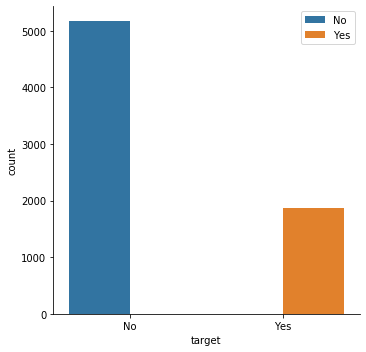

In [17]:
#Lets check the count of each class in target varaible
%matplotlib inline
sns.catplot(x='Churn',data=df,kind='count',hue='Churn')
plt.legend()
plt.xlabel("target")

Here  we see classes are imbalanced and there are less no of  persons who decide to leave.

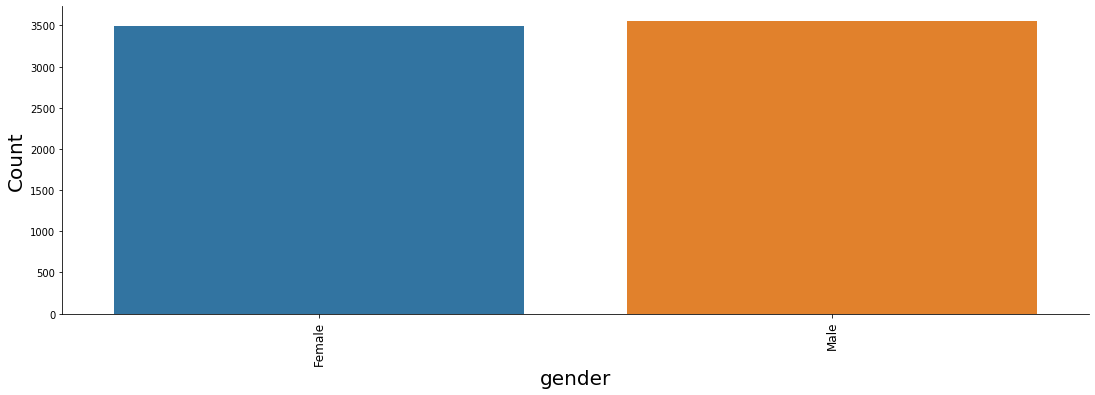

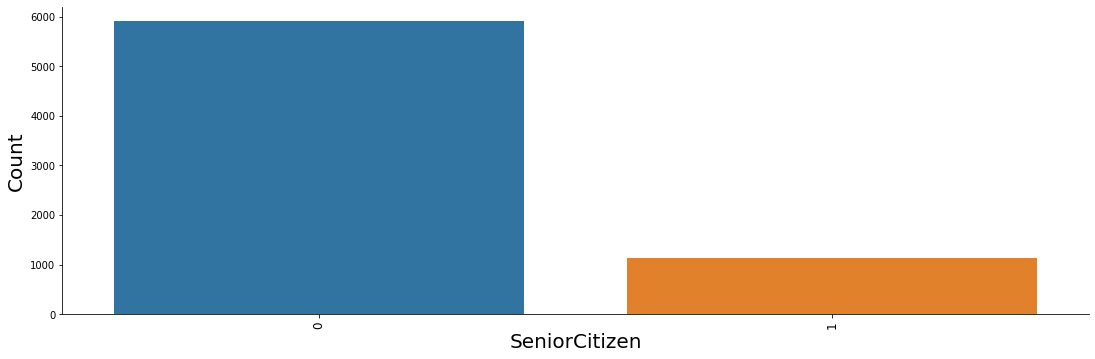

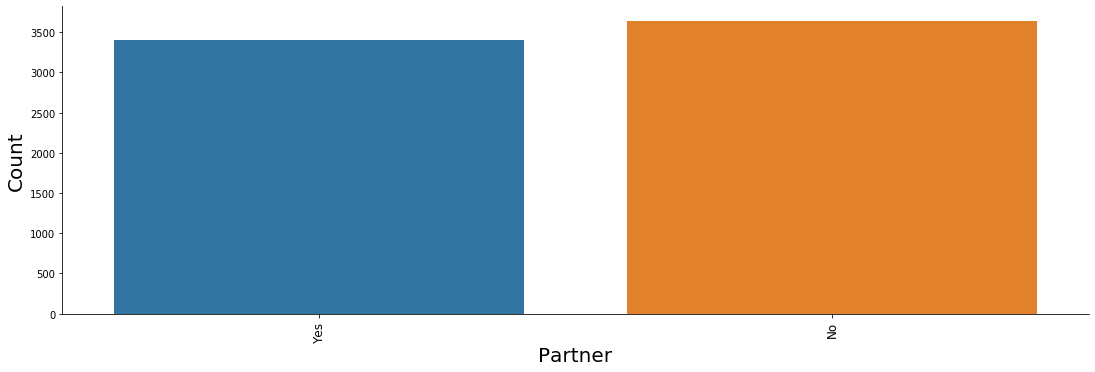

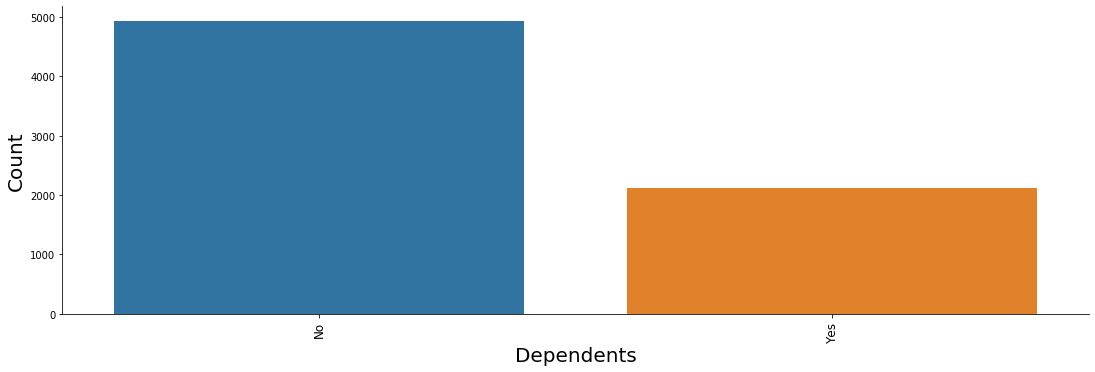

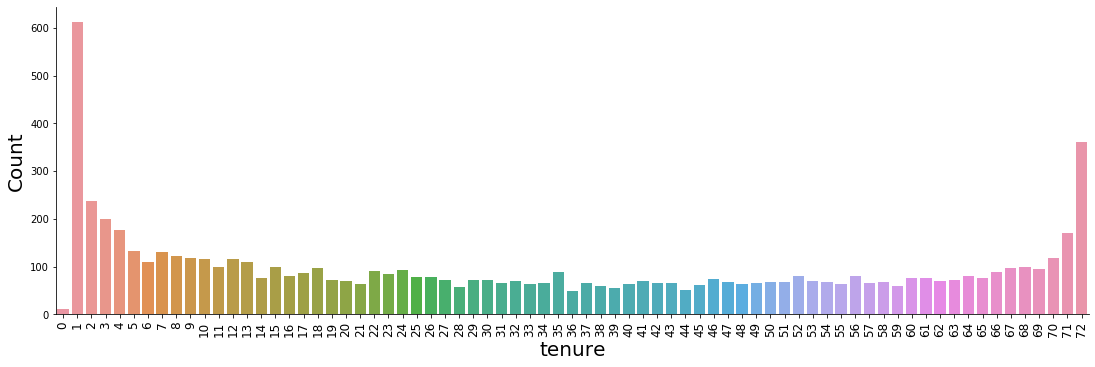

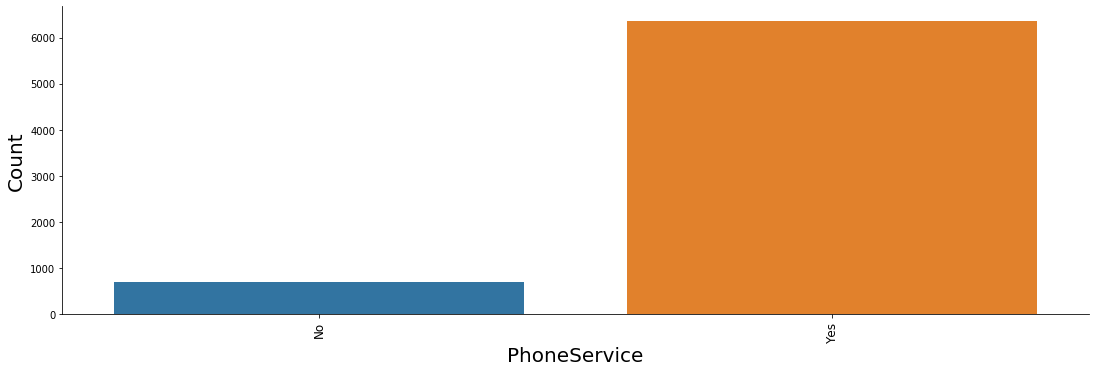

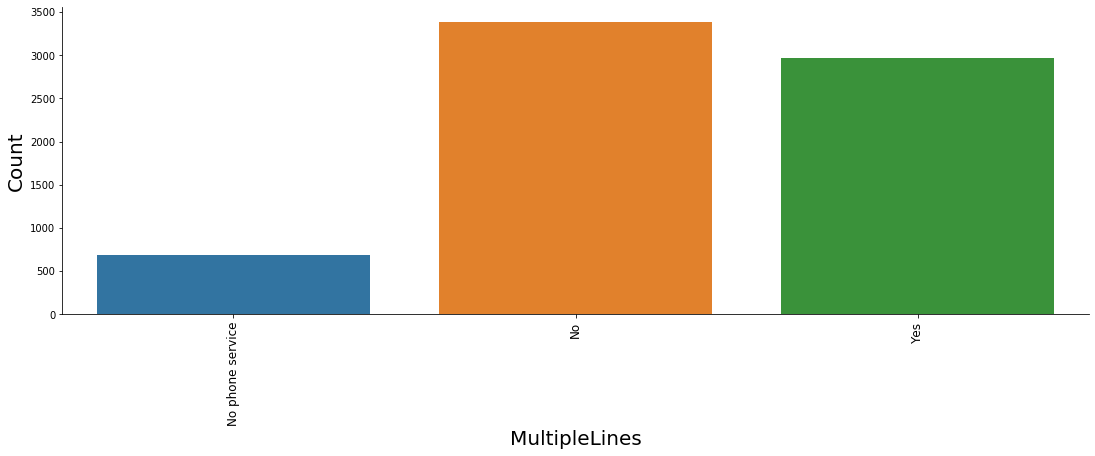

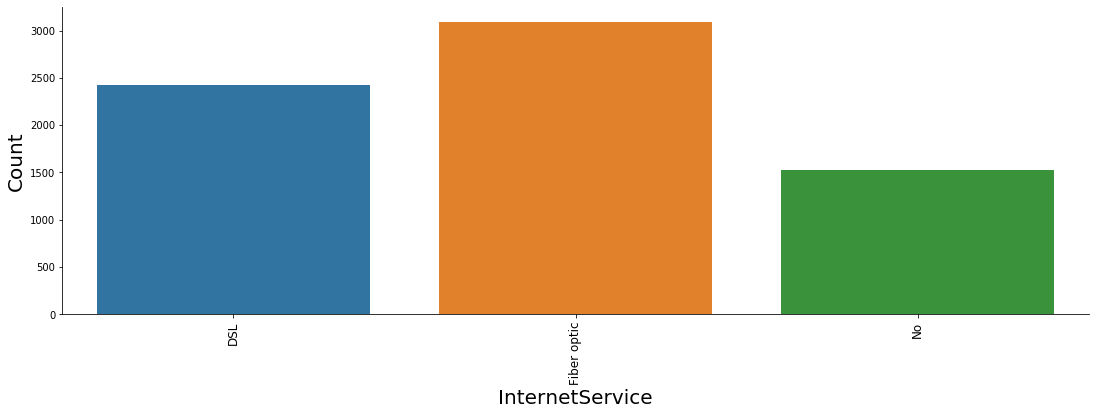

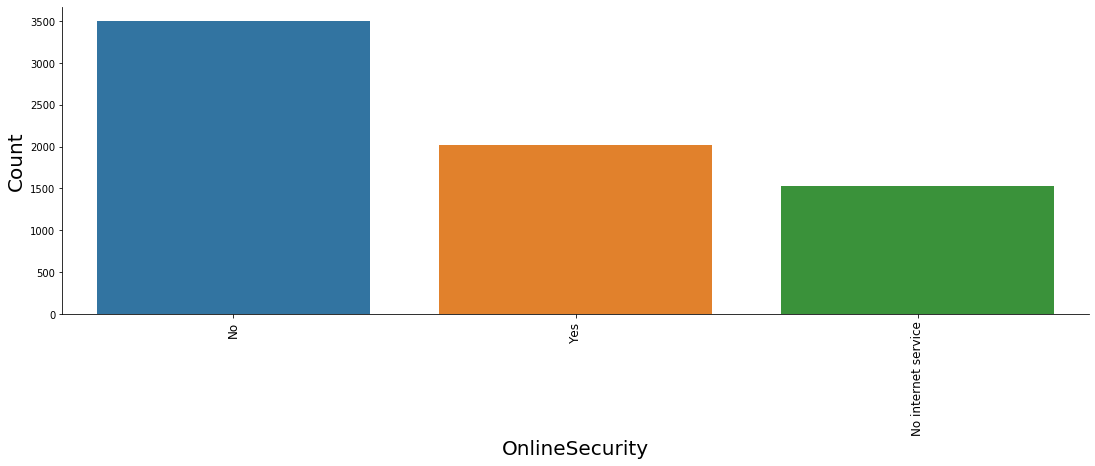

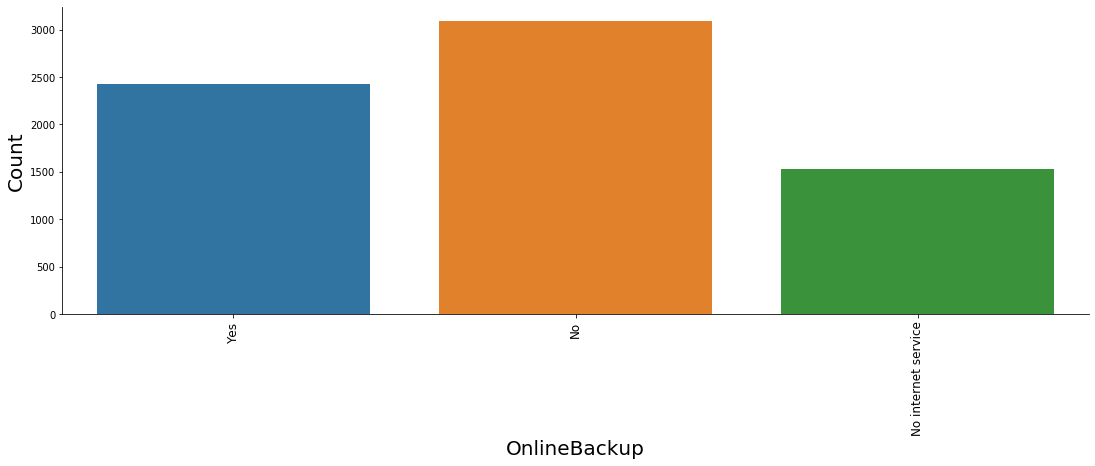

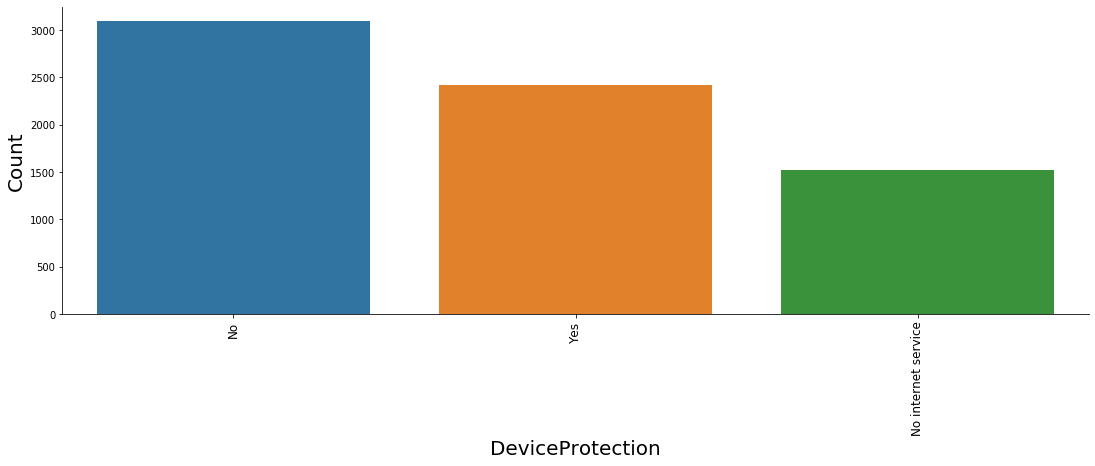

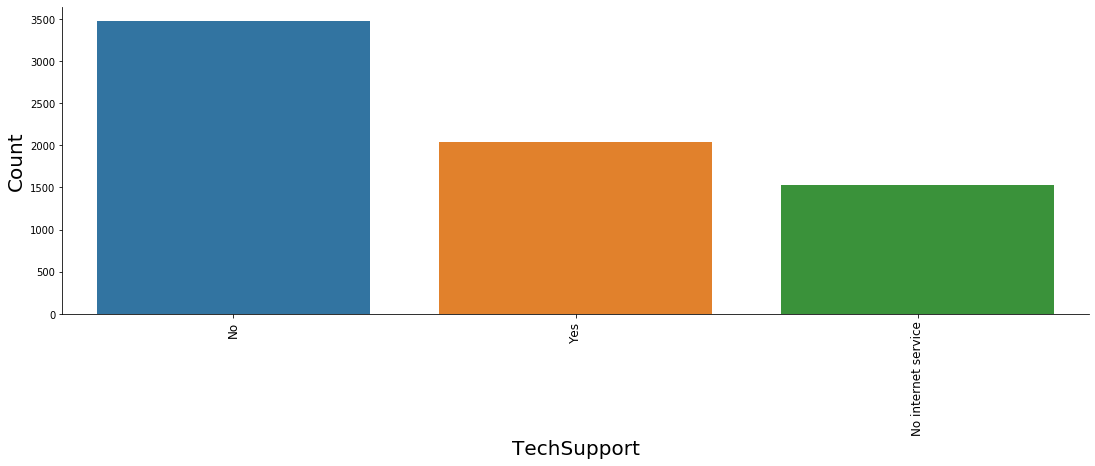

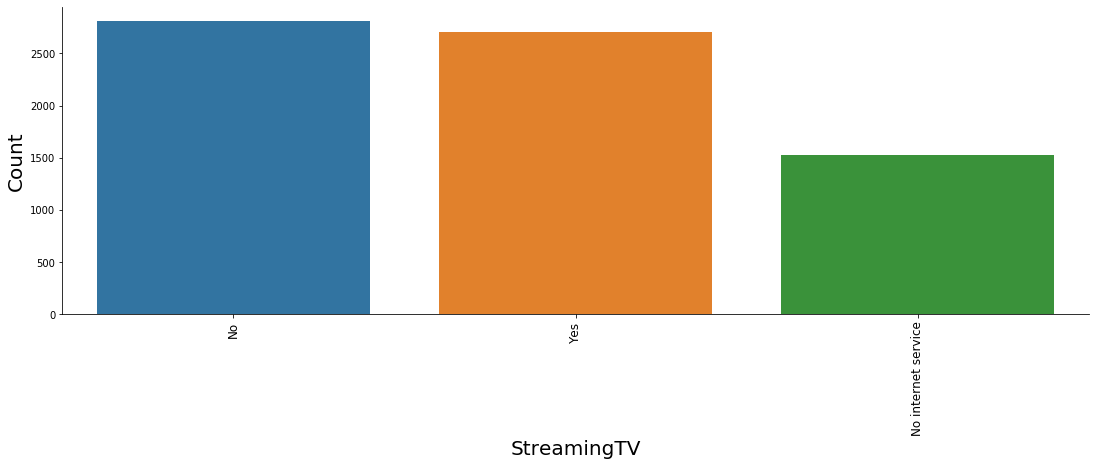

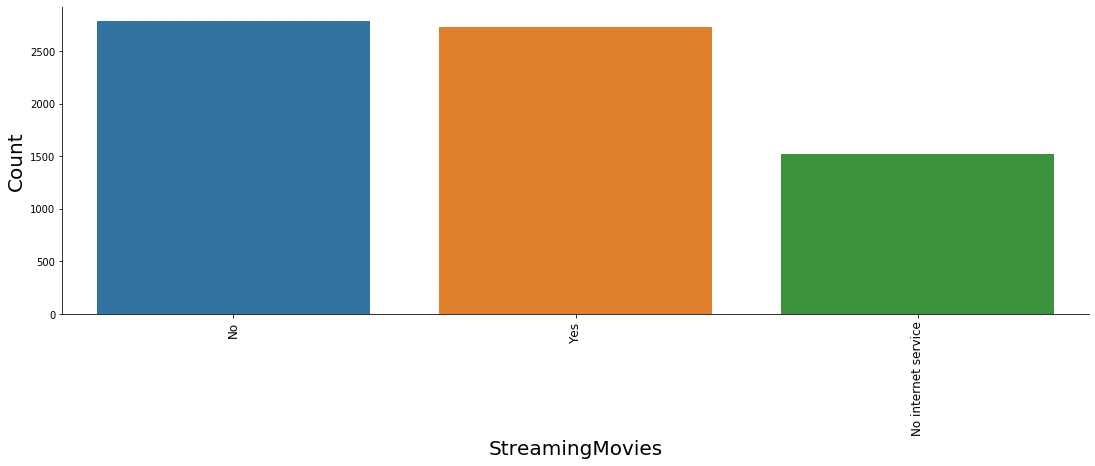

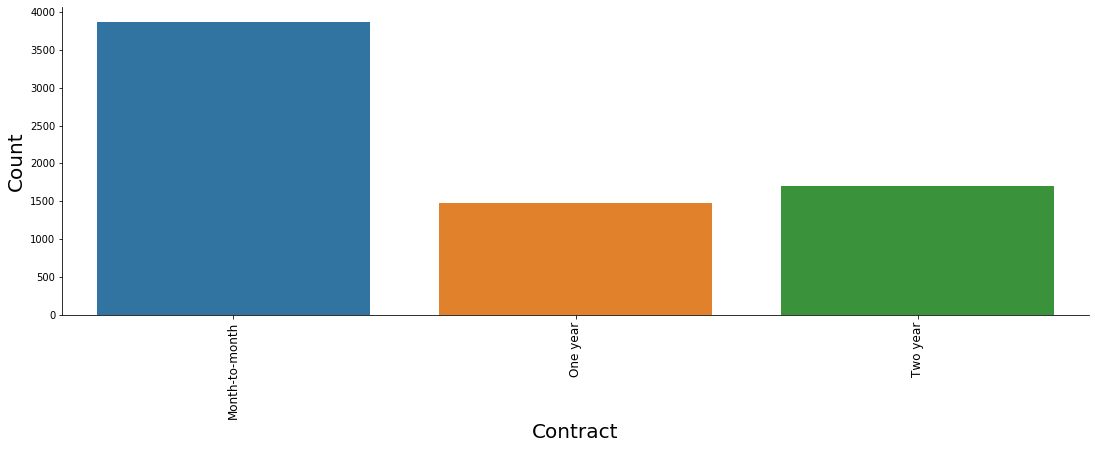

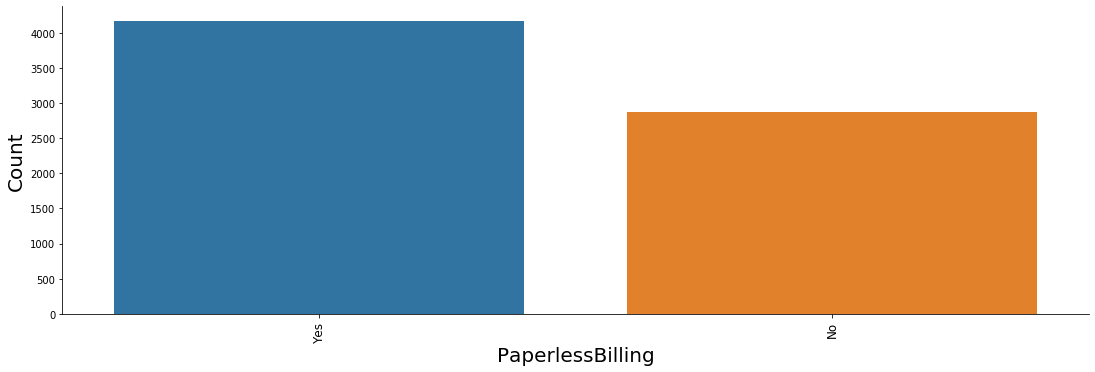

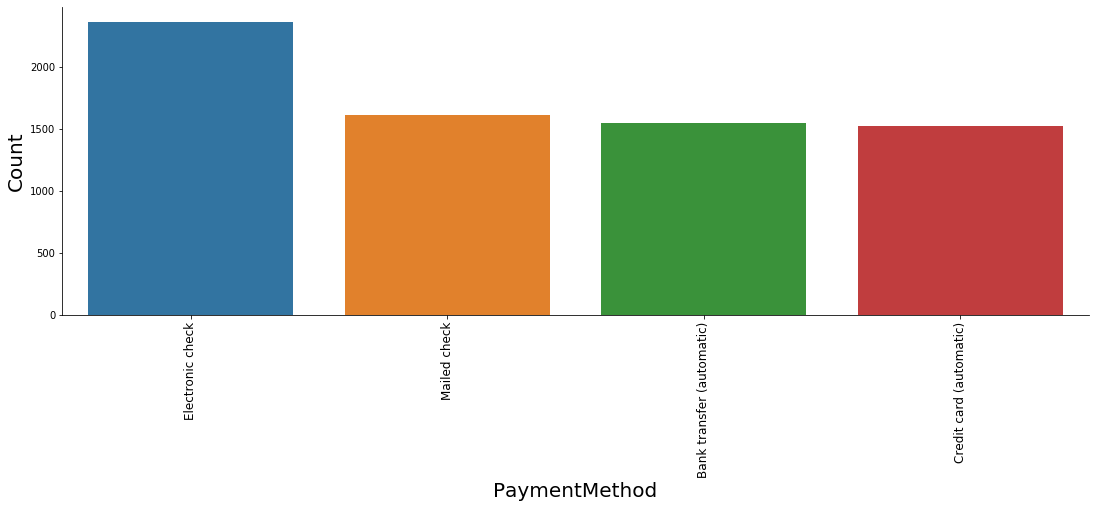

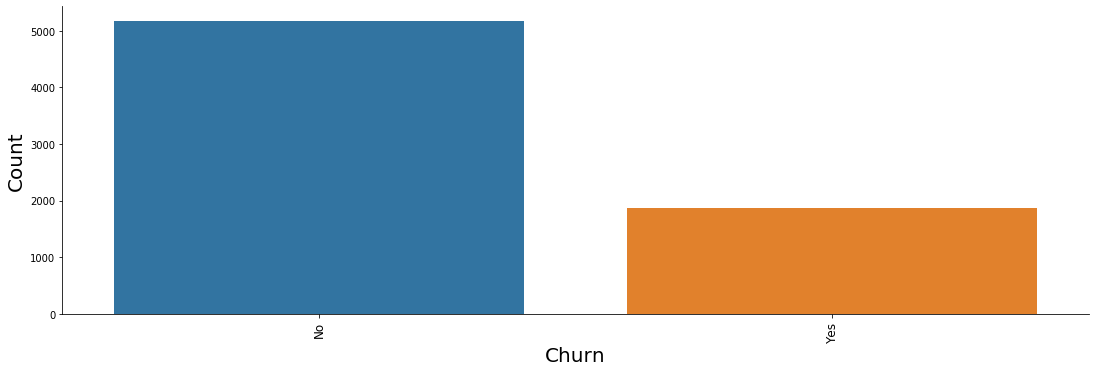

In [18]:
#Counts of each fields excludes 
for i in df.drop(['customerID','MonthlyCharges','TotalCharges'],axis=1).columns.values:
    sns.catplot(x=i,
                data=df,
                kind='count',
                height=5,
                aspect=3,
               )
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Count',fontsize=20)
    plt.xlabel(i,fontsize=20)
    plt.xlabel(i,fontsize=20)

##### Information from the Graph:                           

1) Number of customers who are parteners are less.                 
2) Males and Females customers are almost equal.               
3) Senior Citizen Customers are less as compared to the young ones.              
4) Customers who don't have dependents are more in number.           
5) As Tenure increases number of Customers also decreases            
6) Customers who uses phone services are more.                         
7) Customers who uses Fiber optic internet service are more.                        
8) Customers who don't have any online security, Tech support, Streaming TV, device protection and online backup are more.  
9) Customers whose Contract are month to month are more in number than those who have contract yearly and more than that.   
10) Customers who prefer Paperless billing are more in number.                               
11) Customers who use Electronic Check are more in number.                         
12) Customers who won't leave are more in number.                  

SeniorCitizen        AxesSubplot(0.125,0.772143;0.168478x0.107857)
tenure            AxesSubplot(0.327174,0.772143;0.168478x0.107857)
MonthlyCharges    AxesSubplot(0.529348,0.772143;0.168478x0.107857)
TotalCharges      AxesSubplot(0.731522,0.772143;0.168478x0.107857)
dtype: object

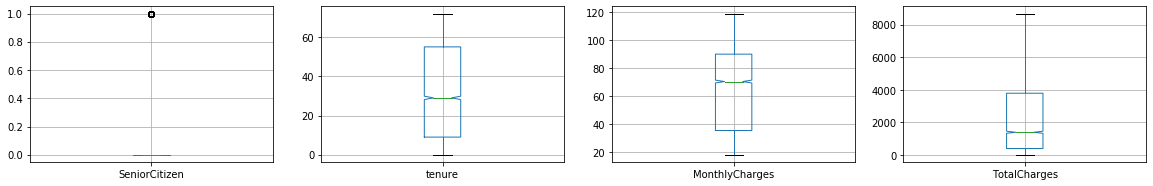

In [19]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(6,4),figsize=(20,20),grid=True,notch=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D6DC47E48>,
      dtype=object)

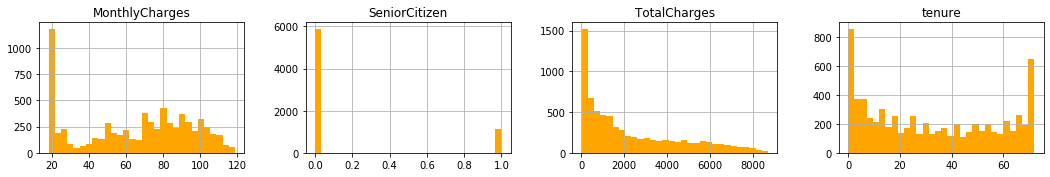

In [20]:
#plotting histograms for checking normal distribution
df.hist(figsize=(18,18),grid=True,layout=(6,4),bins=30,color='orange')

# Bivarient  Analysis


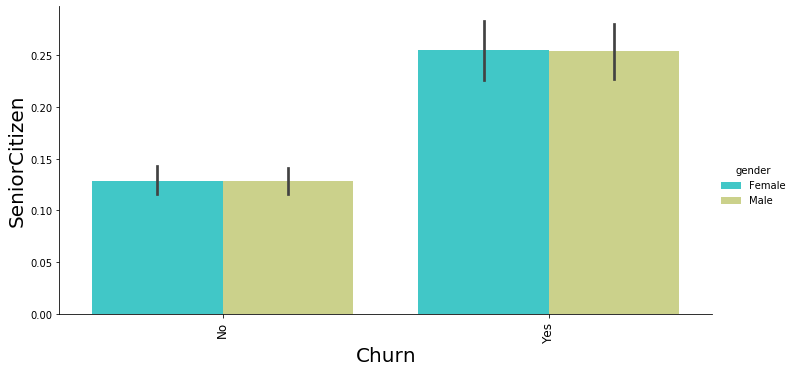

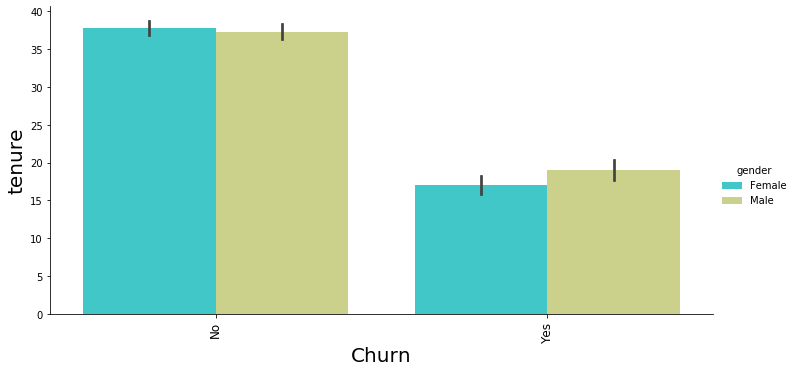

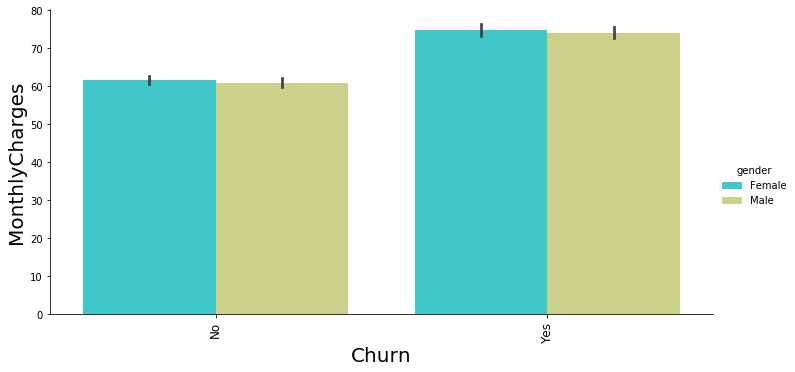

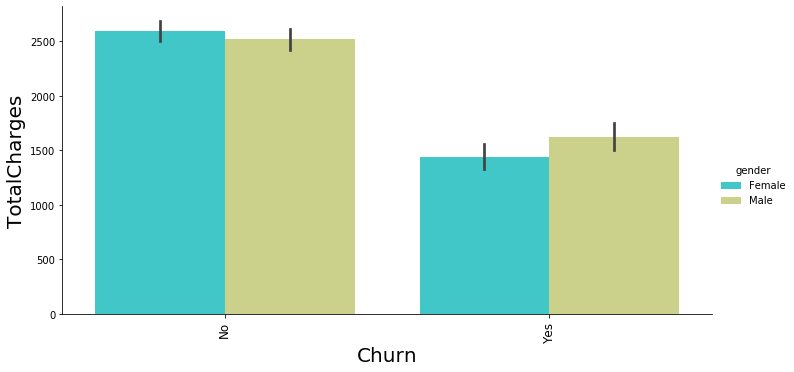

In [21]:
#numerical fields vs target
for i in num_col.index.values:
    sns.catplot(y=i,
                data=df,
                x='Churn',
                palette='rainbow',
                height=5,
                aspect=2,
                hue='gender',
               kind='bar')
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel(i,fontsize=20)
    plt.xlabel('Churn',fontsize=20)


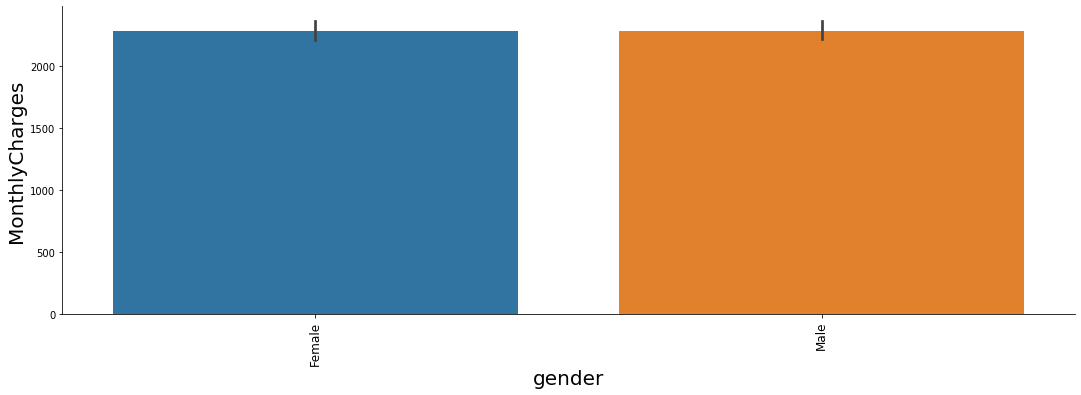

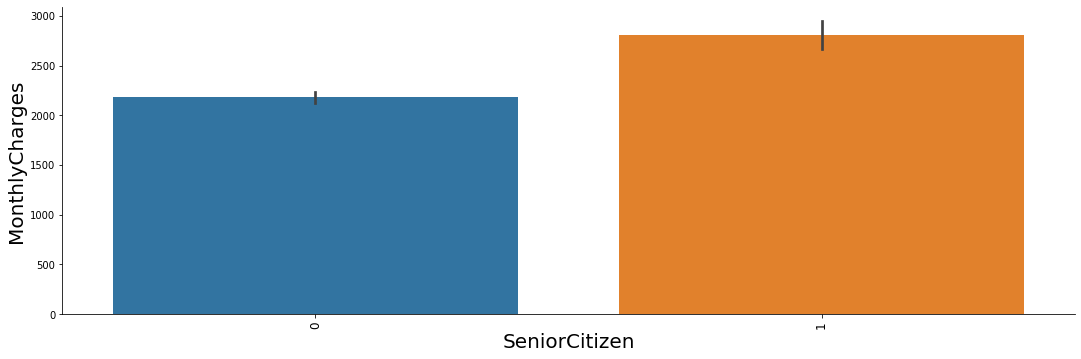

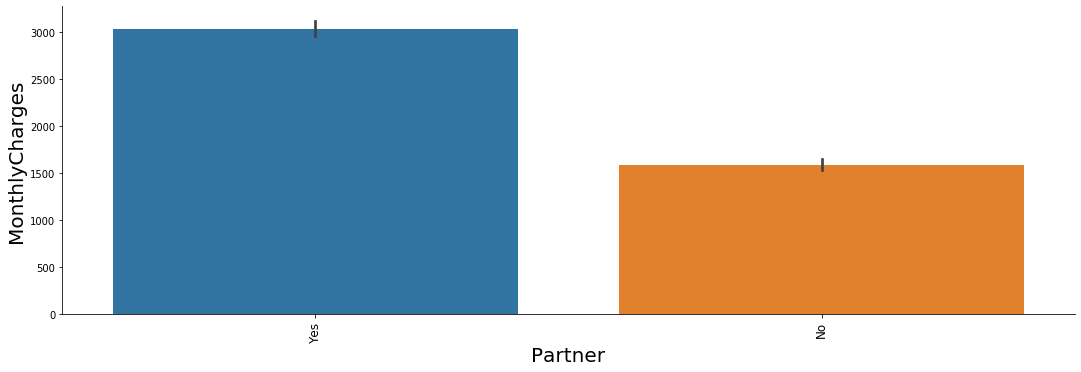

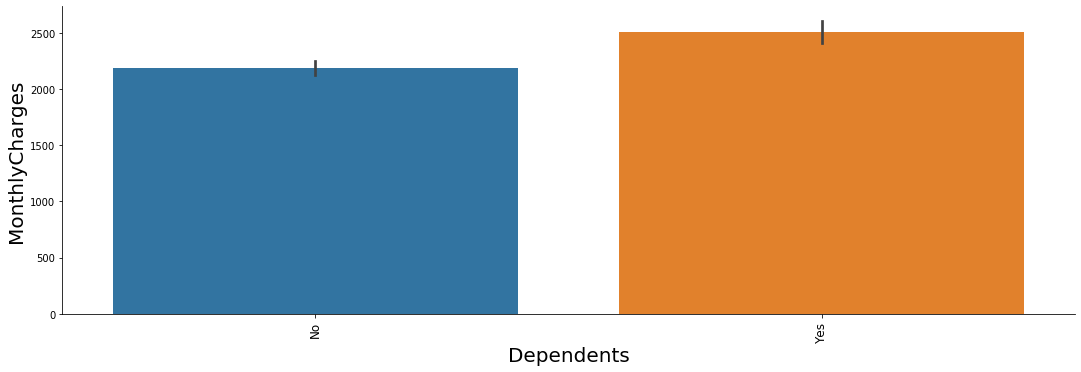

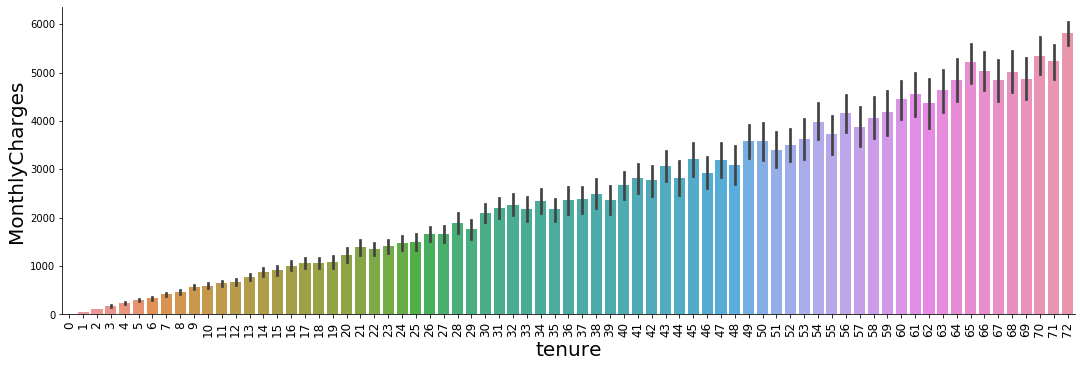

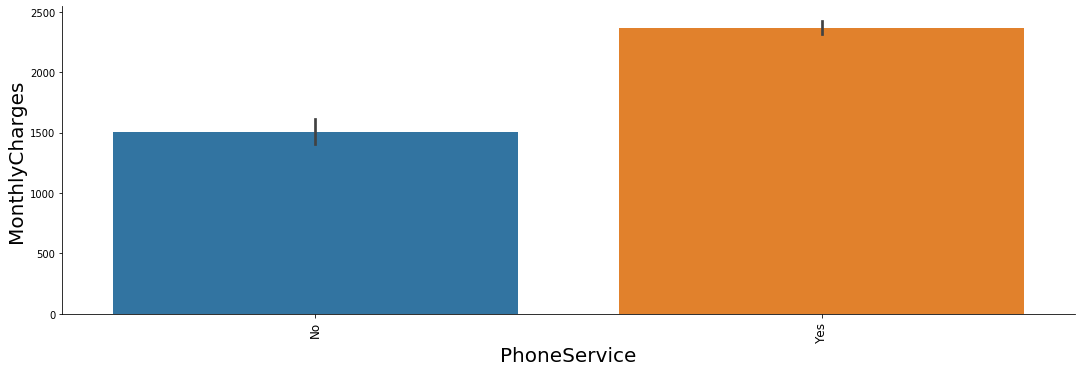

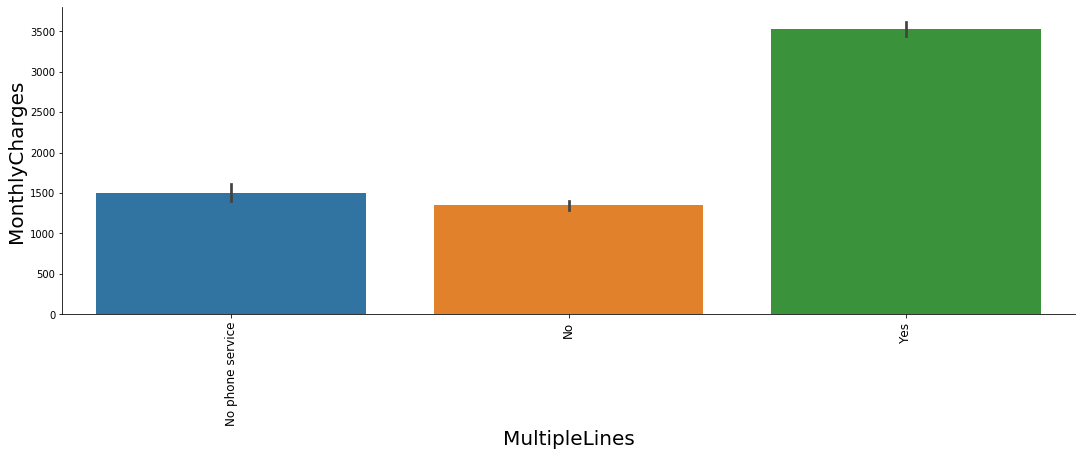

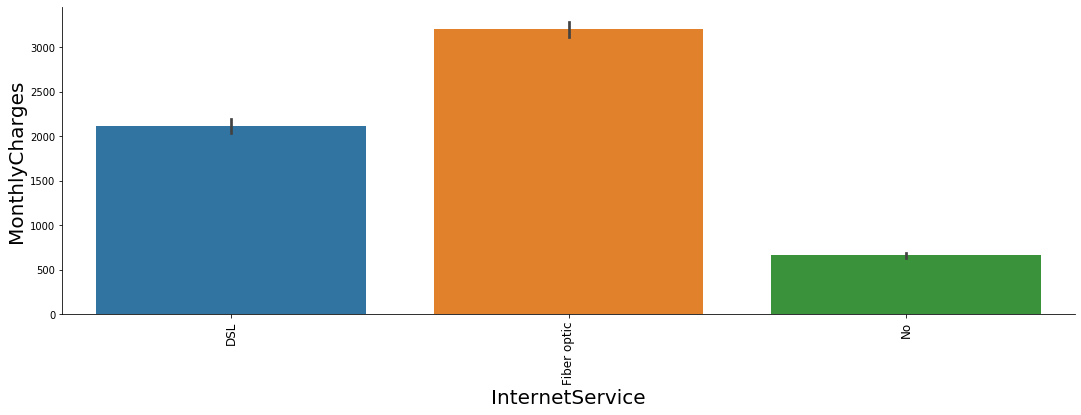

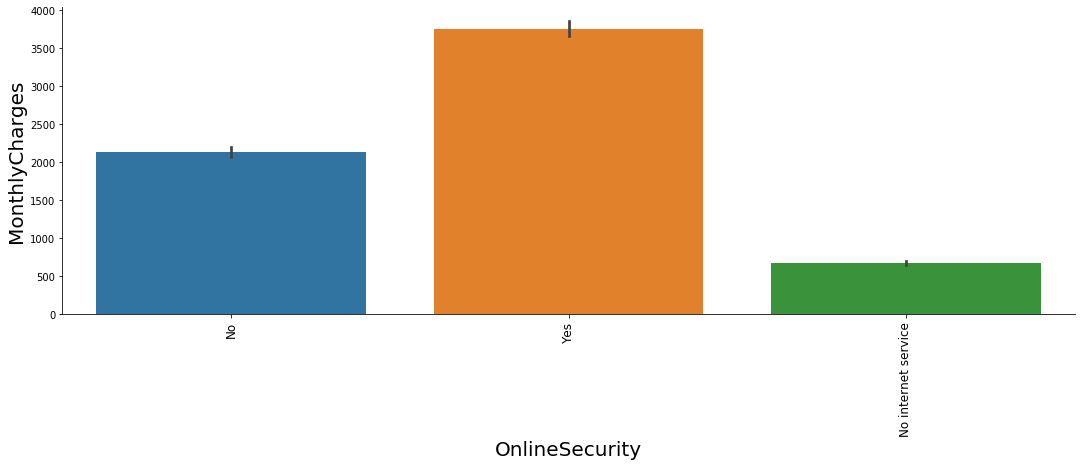

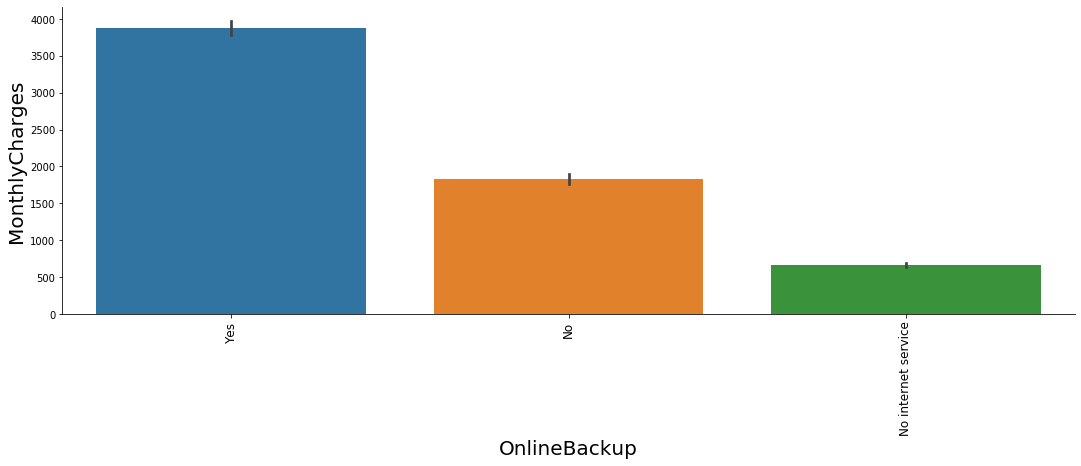

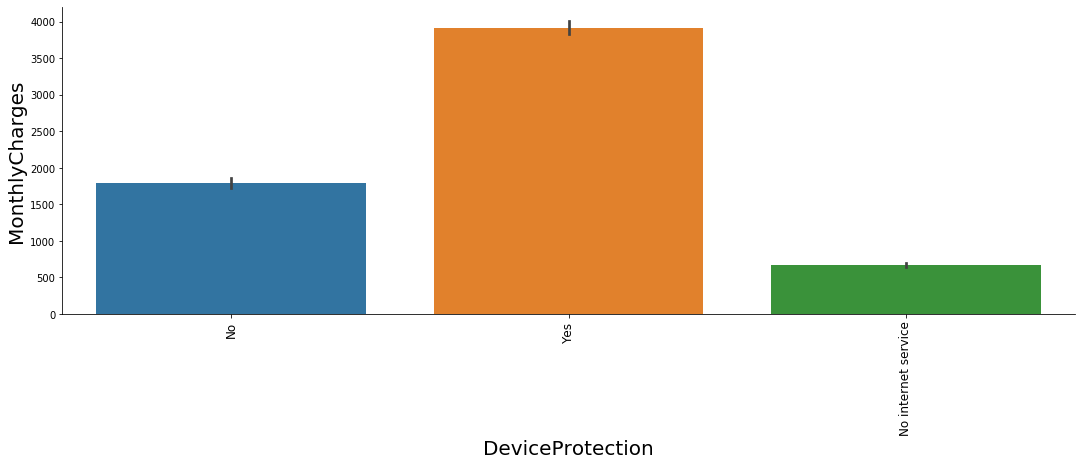

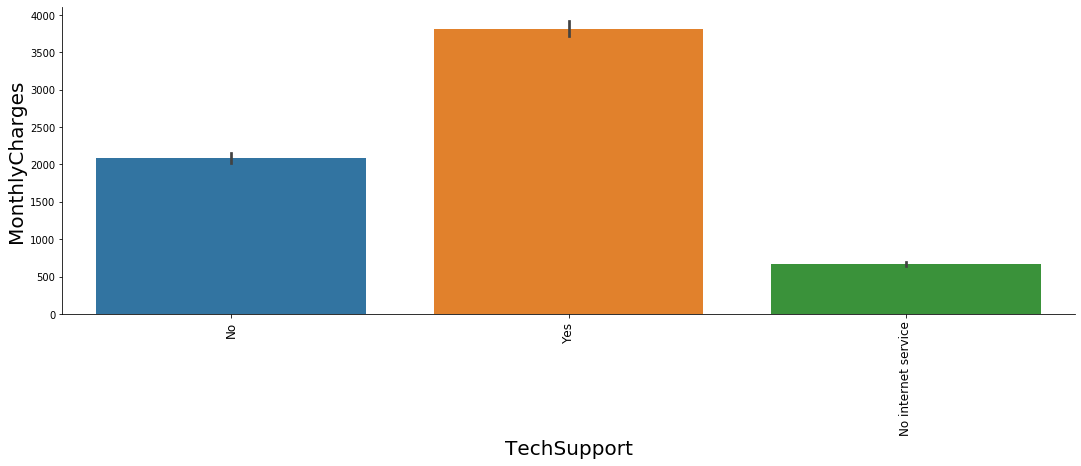

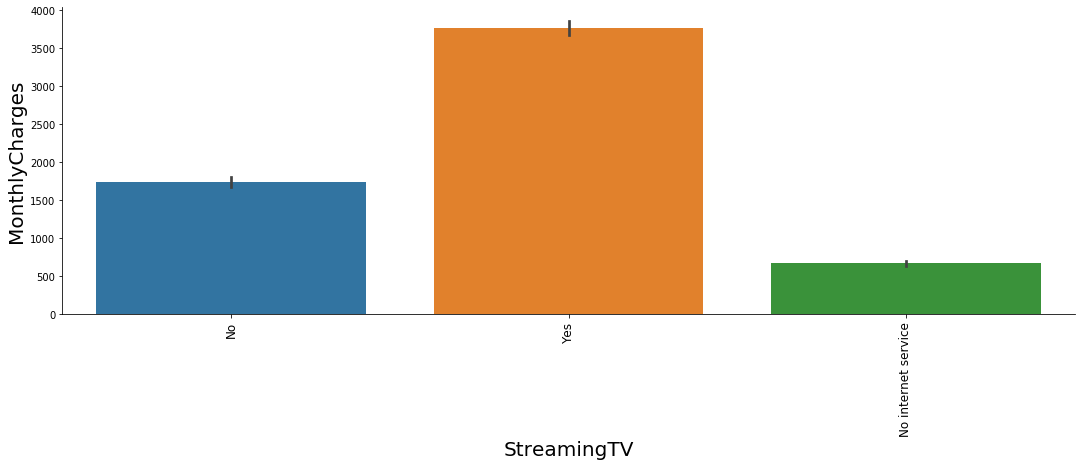

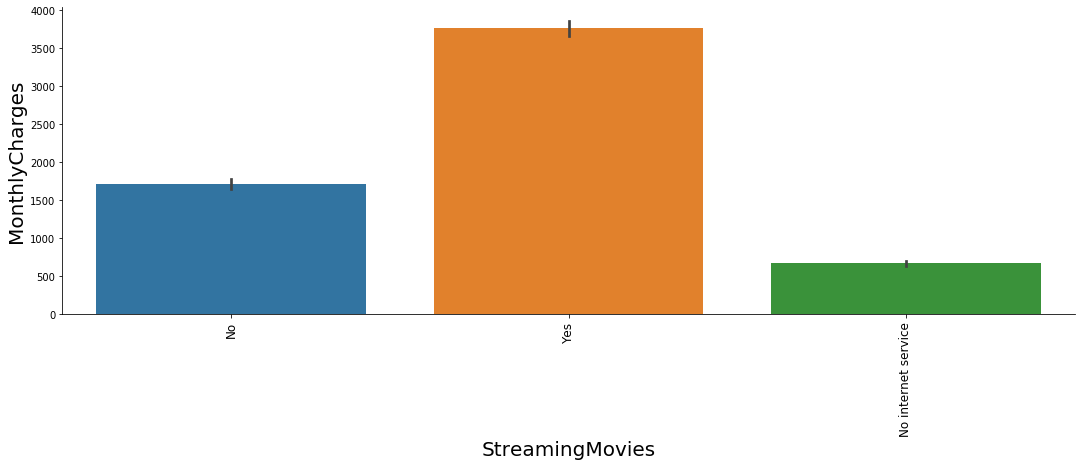

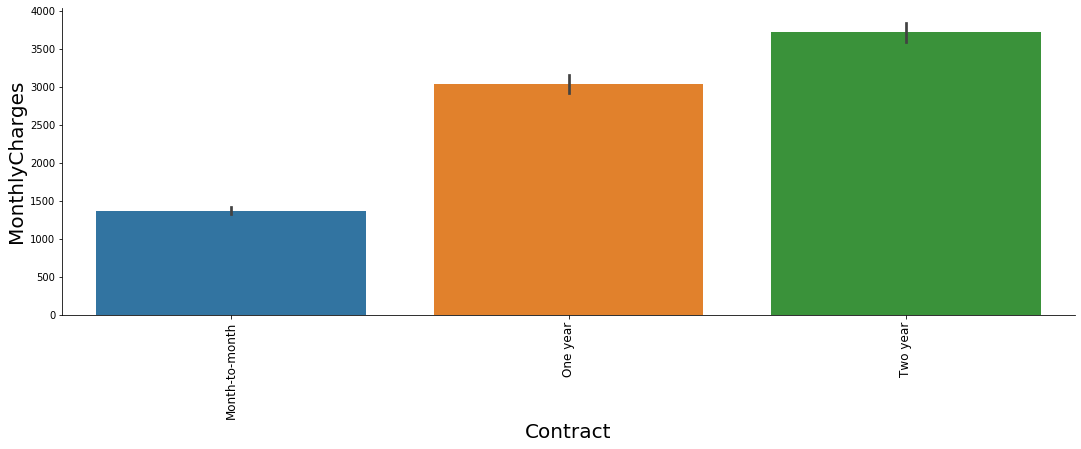

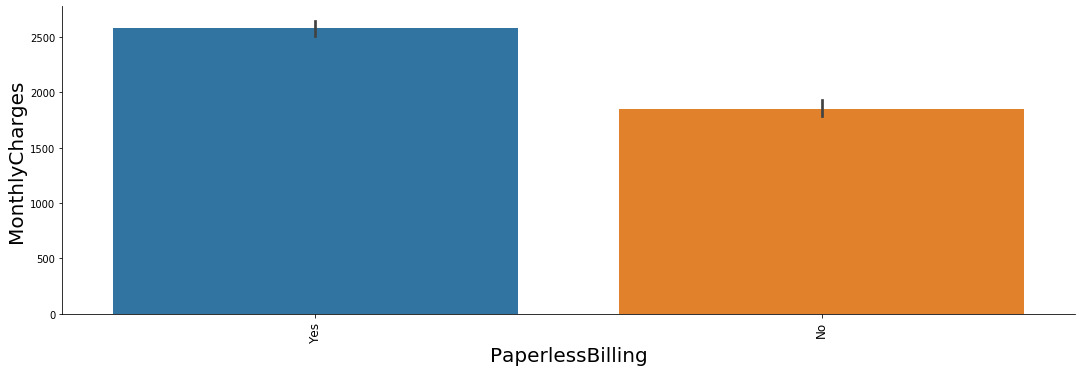

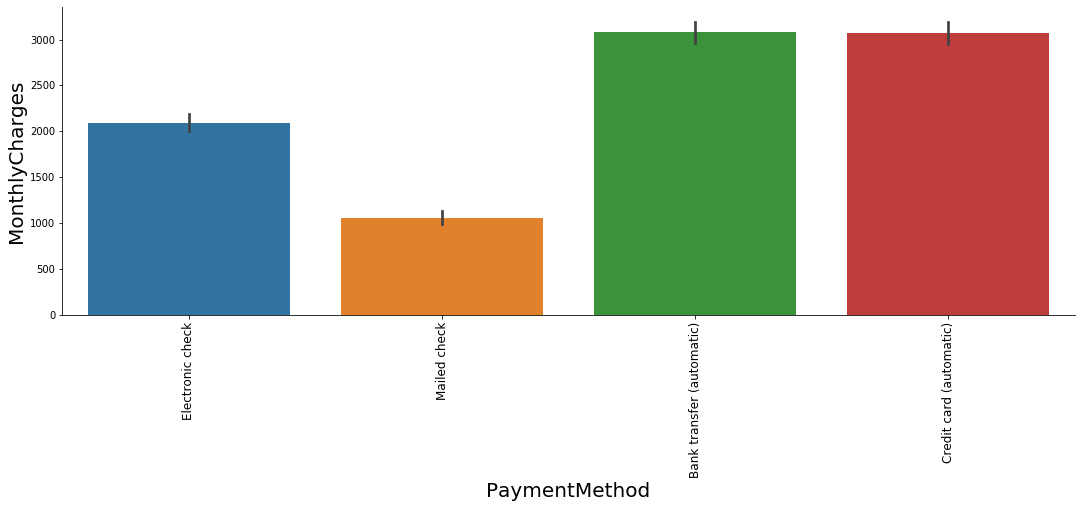

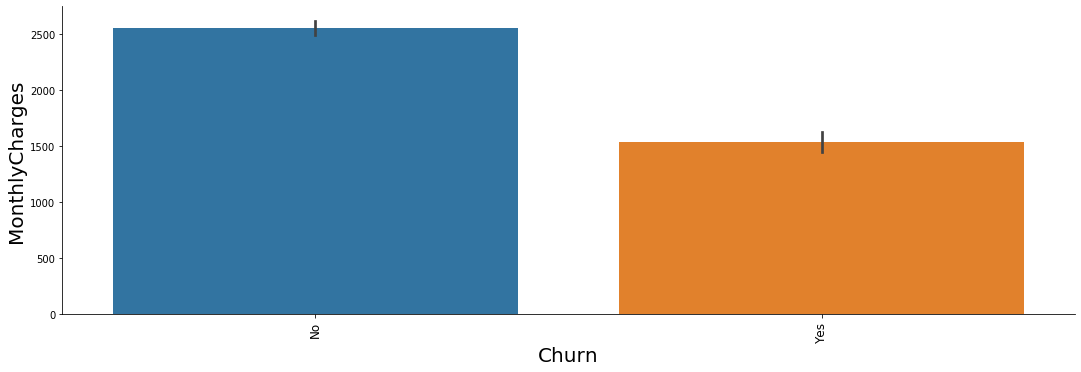

In [22]:
# for loop to plot graphs between Different features and Total charges...
for i in df.drop(['customerID','MonthlyCharges','TotalCharges'],axis=1).columns.values:
    sns.catplot(x=i,
                data=df,
                y='TotalCharges',
                kind='bar',
                height=5,
                aspect=3,            
               )
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('MonthlyCharges',fontsize=20)
    plt.xlabel(i,fontsize=20)

##### Information from the graph:                                   
                           
1) Senior citizen have more total chrages to company.                 
2) Total Charges are more for those who are Parteners.             
3) Those who have dependents have more Total Charges.             
4) As tenure increases Total Charges also increases.                         
5) Customers having Fiber optic(internet service), Phoneservice, Online Security, Online Backup, Device Protection, TechSupport, Streaming Movies and Streming TV do have more Total Charges.               
6) Customers having 2 year Contract have more Total Charges.              
7) Customers who prefer Paperless billing have moe Total Charges.            
8) Bank Transfer(automatic) and credit card(automatic) have more Total Charges.           
9) The customers who don't decide to leave are have more total charges.                           

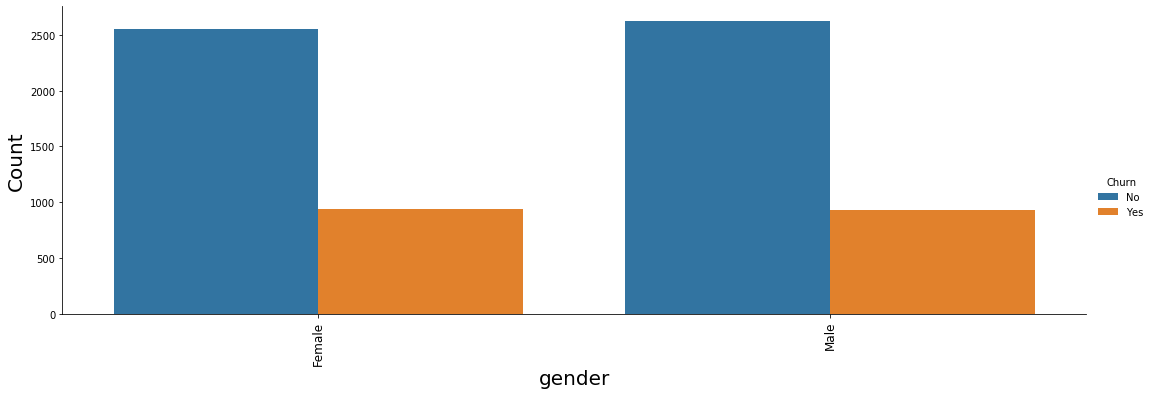

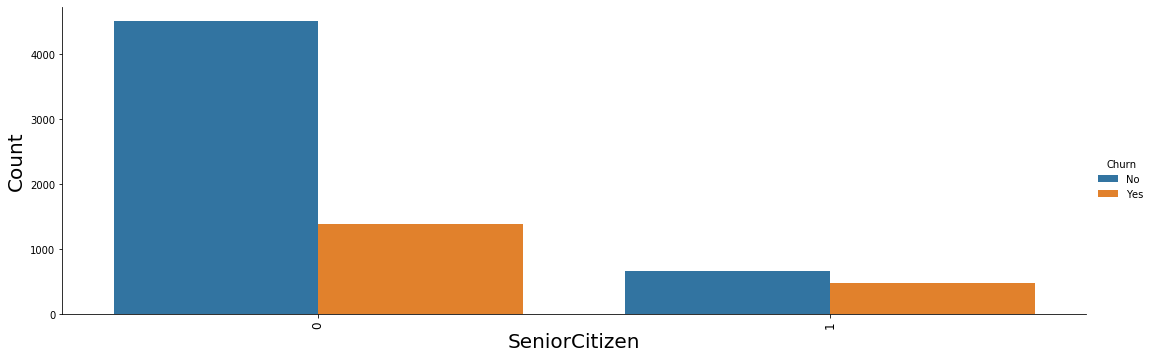

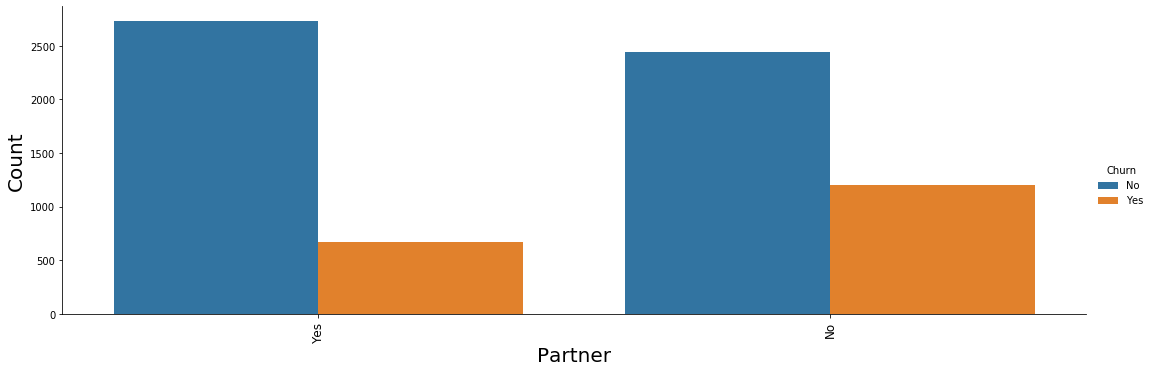

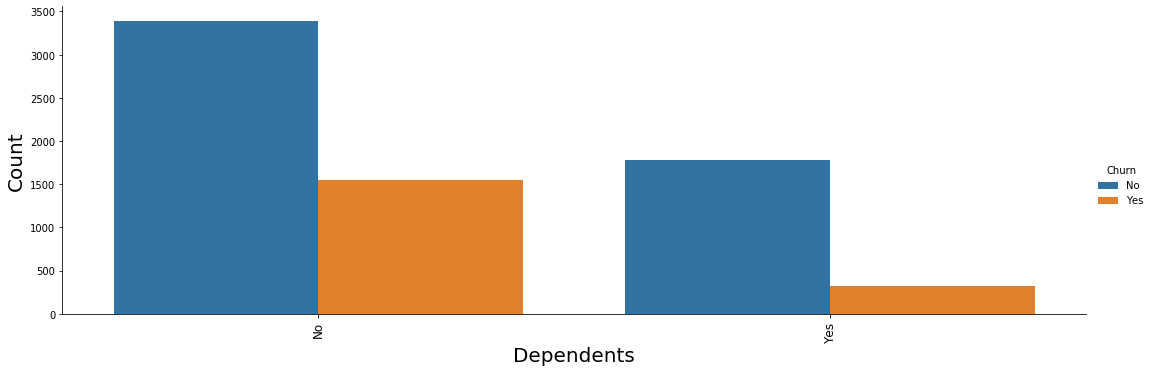

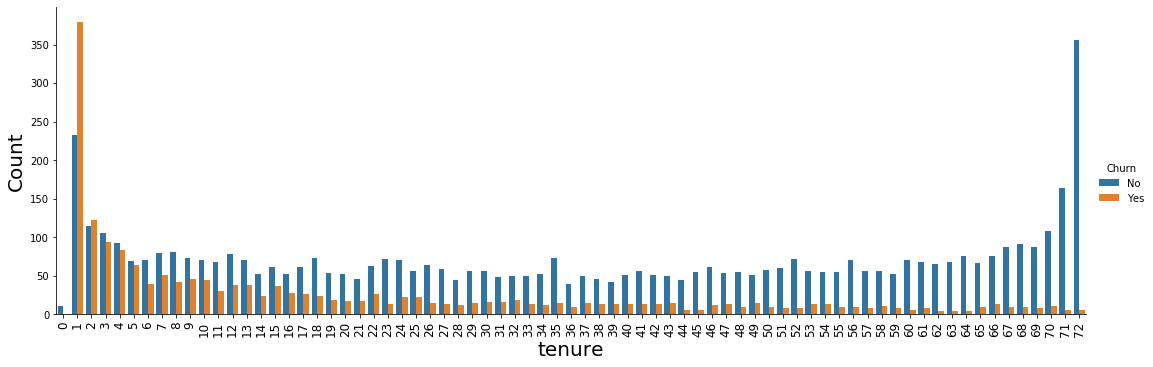

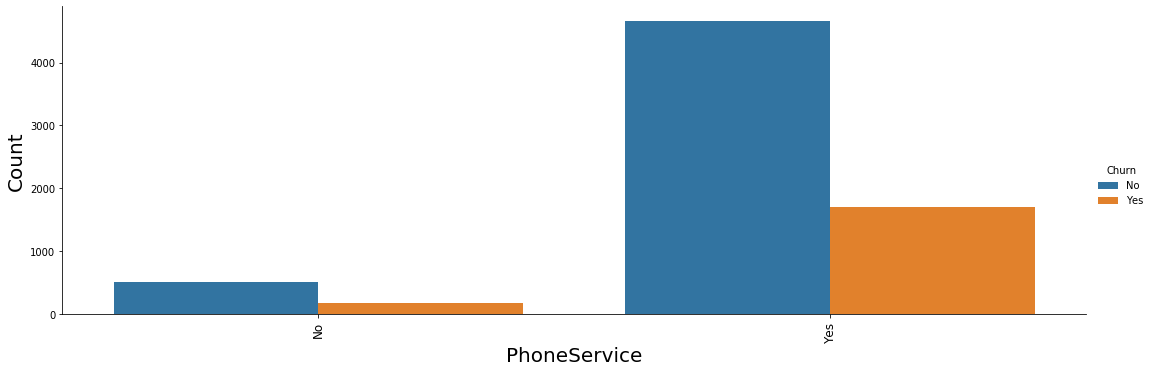

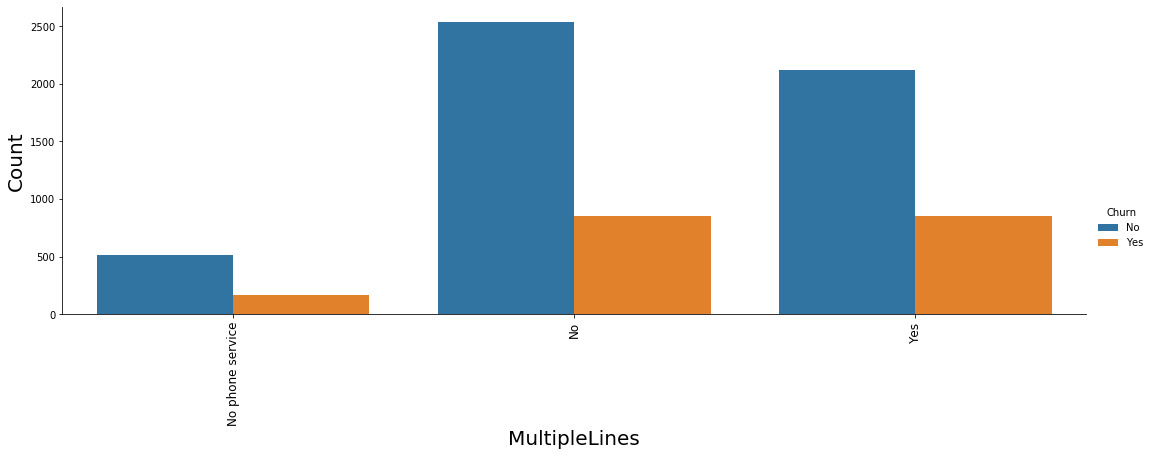

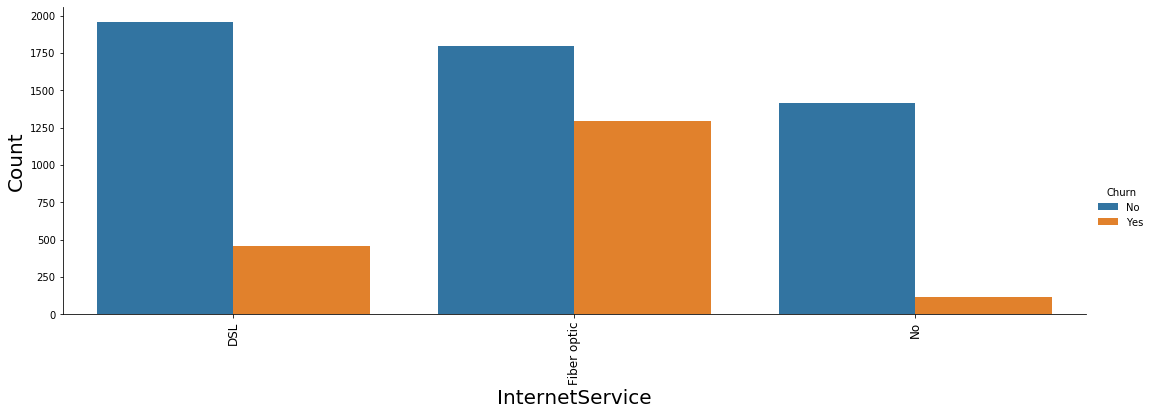

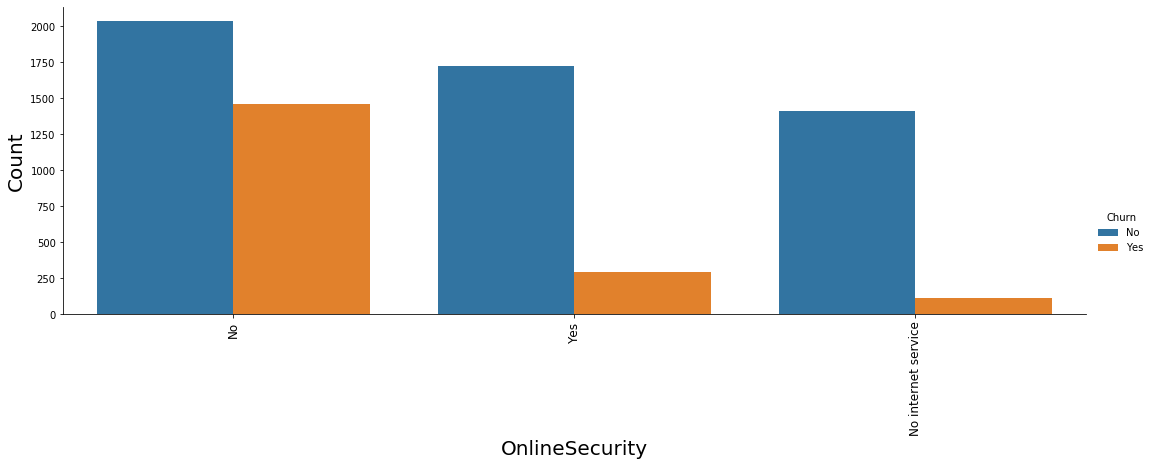

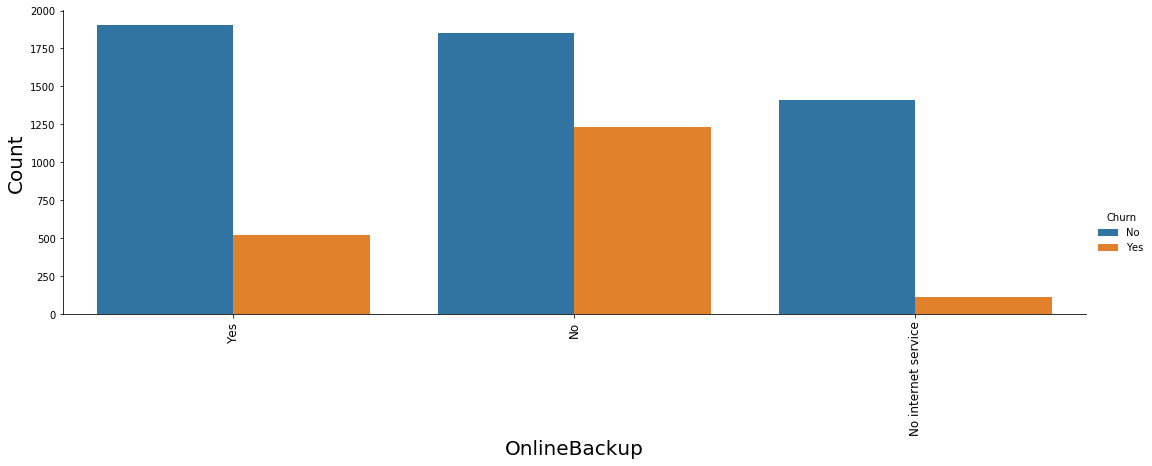

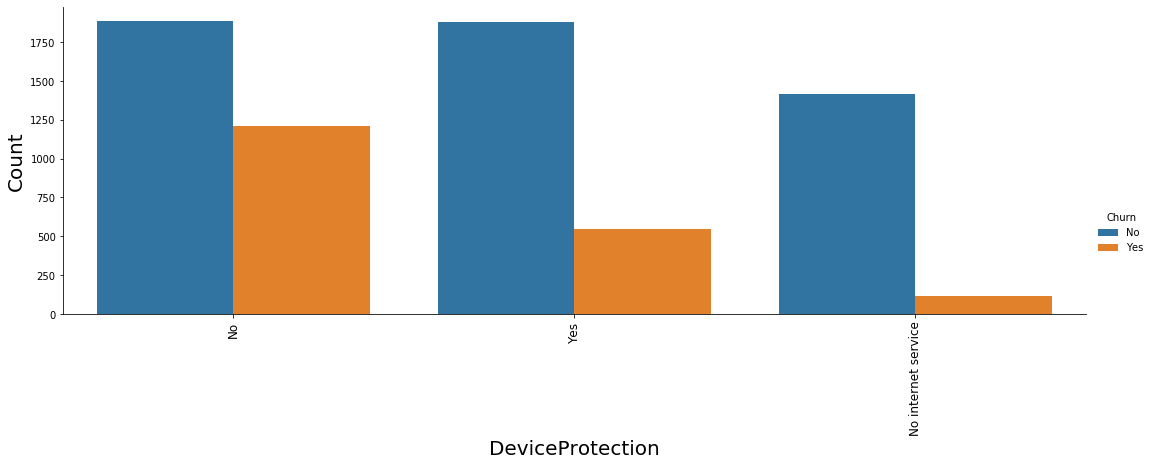

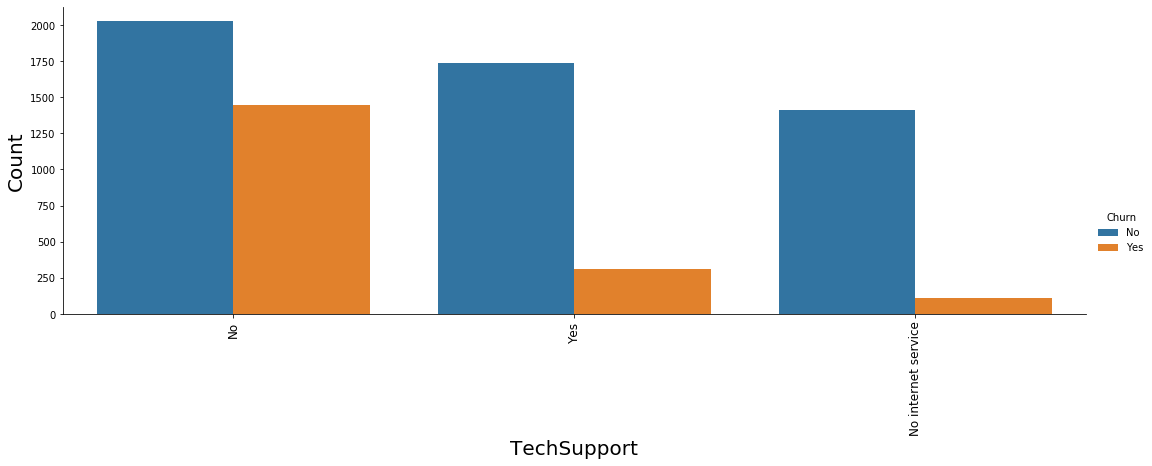

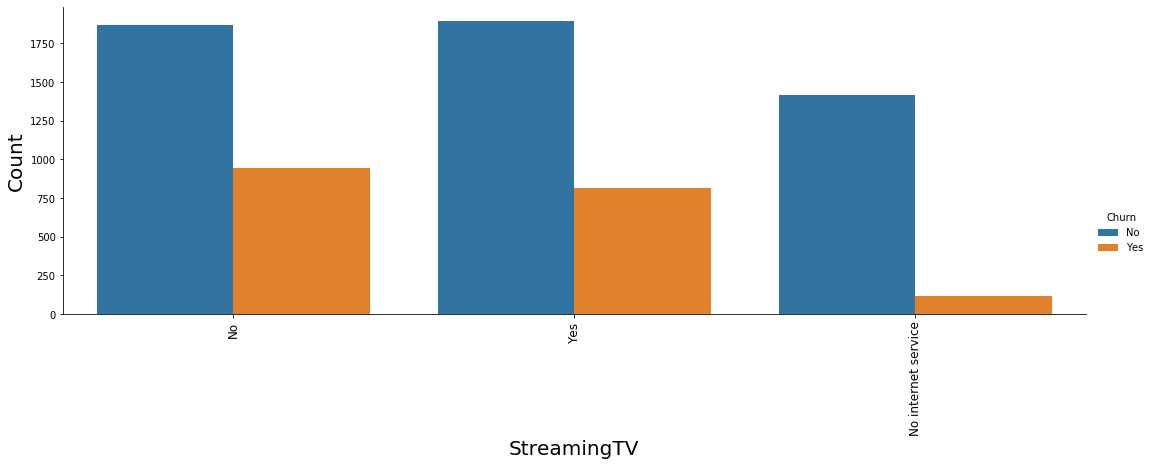

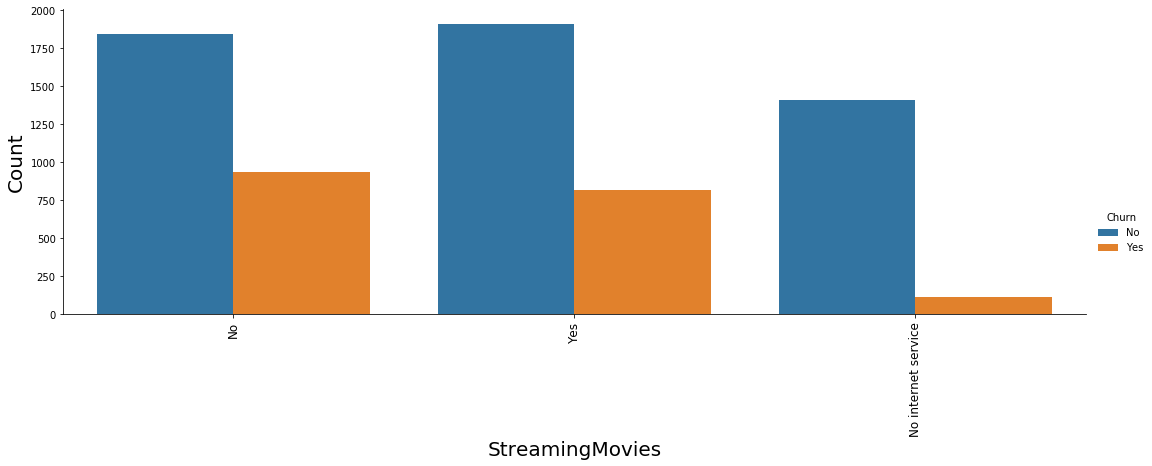

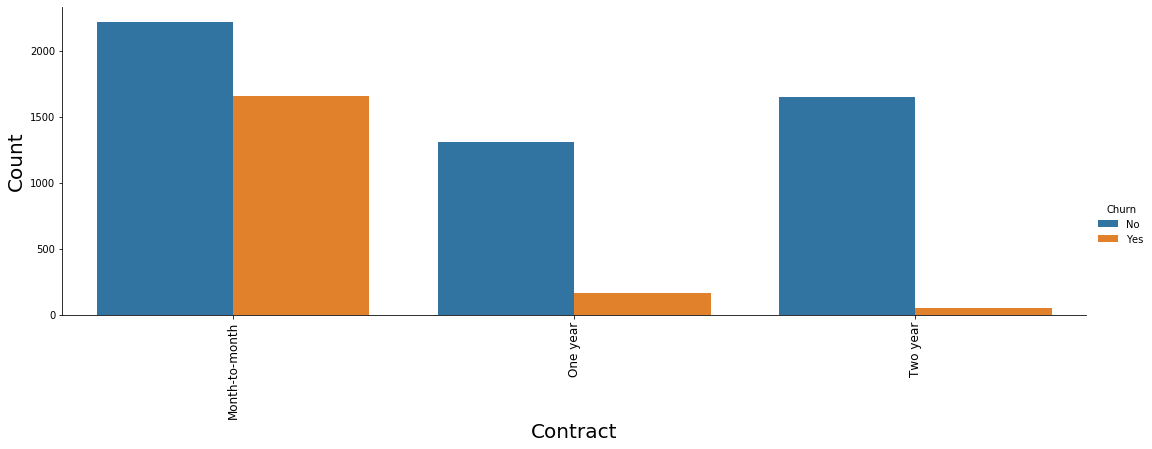

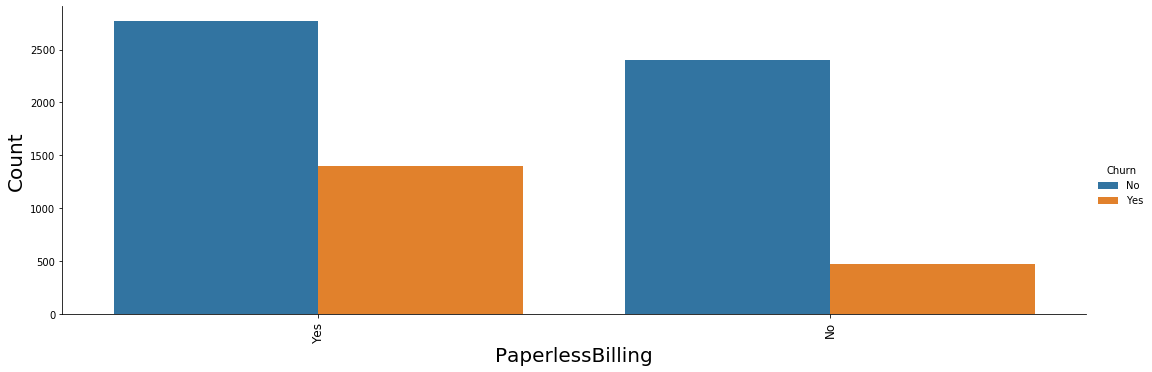

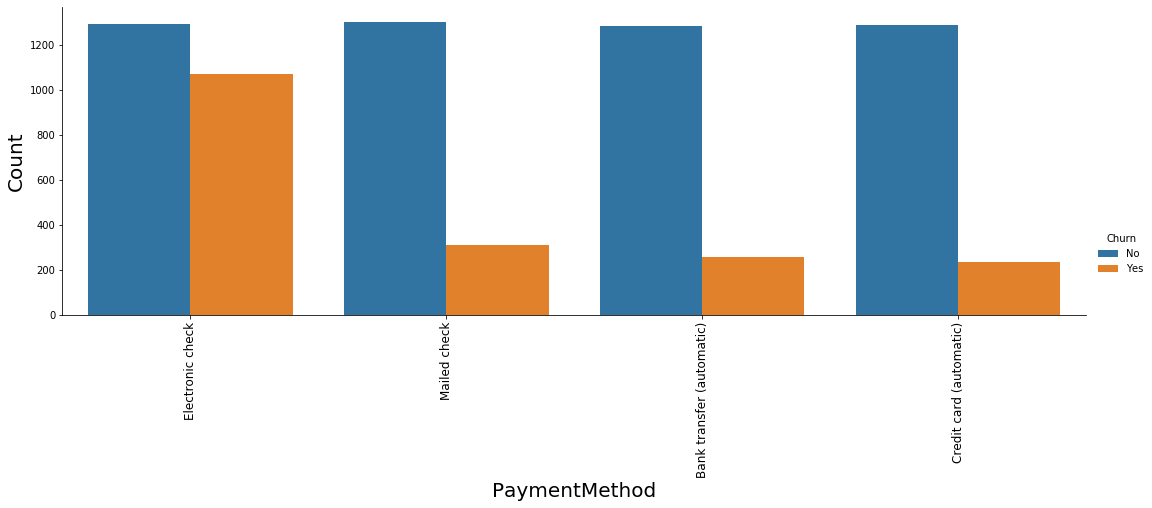

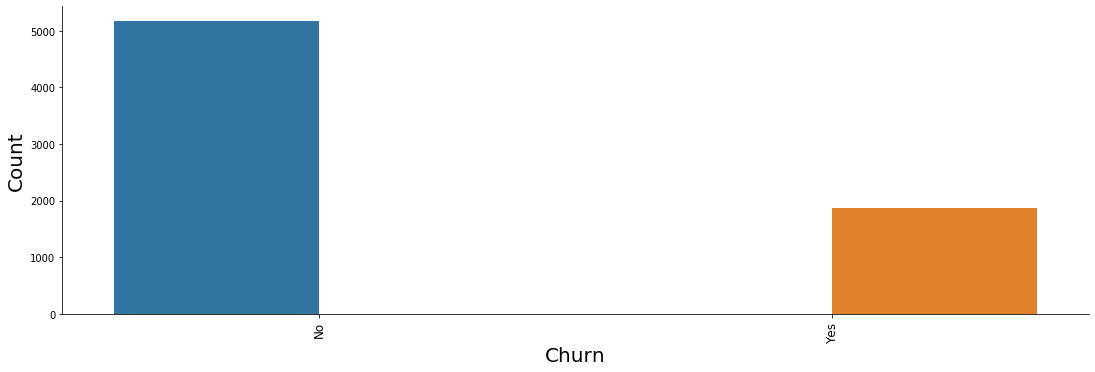

In [23]:
# for loop to plot the graphs between different features counts with respect to the churn..... 
for i in df.drop(['customerID','MonthlyCharges','TotalCharges'],axis=1).columns.values:
    sns.catplot(x=i,
                data=df,
                kind='count',
                height=5,
                aspect=3,
                hue='Churn'
               )
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Count',fontsize=20)
    plt.xlabel(i,fontsize=20)
    plt.xlabel(i,fontsize=20)

##### Information from the Graph:                                      

1) Number of customers who are parteners are less.                  
2) Males and Females customers are almost equal.                                
3) Proportion of churn in Senior Citizen Customers are more as compared to the young ones.                    
4) Proportion of churn in customers who aren't parteners is more.                     
5) Customers who don't have dependents are more in number and have more proportion of churn.                
6) As Tenure increases number of Customers with churn also decreases                  
7) Customers who uses phone services have more proportion of churn.                    
8) Customers who uses Fiber optic internet service have more proportion of churn.                
9) Customers who don't have any online security, Tech support, Streaming TV, device protection and online backup have more proportion of churn.                              
10) Customers whose Contract are month to month are more in number and have more proportion of churn.                 
11) Customers who prefer Paperless billing are more in number and have more churn.            
12) Customers who use Electronic Check are more in number and have more churn proportion.                  
13) Customers who won't leave are more in number.                     

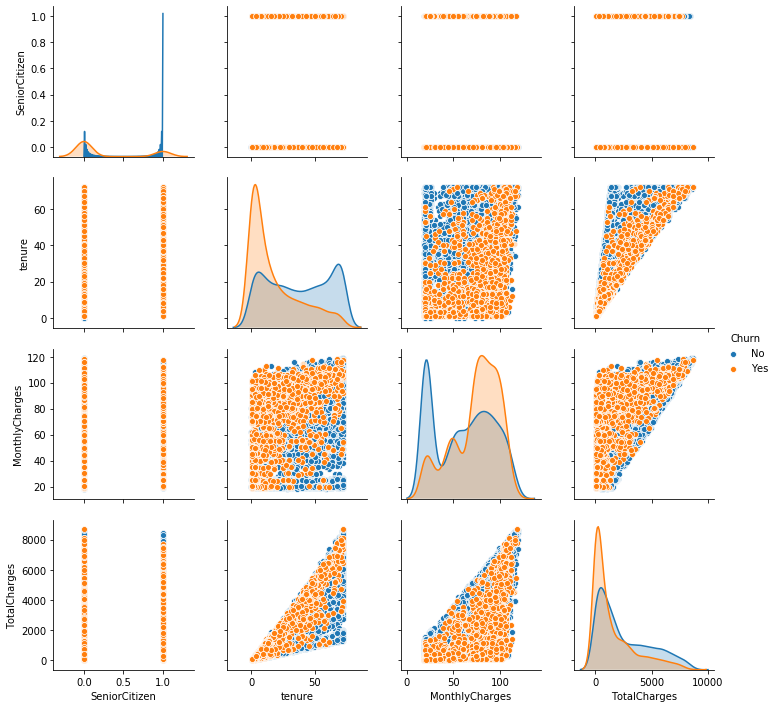

In [24]:
#plotting a pair plot
sns.pairplot(data=df,hue='Churn')

In [25]:
# Using Label Encoder so that object data can be convert to binary data so that data can be evaluated
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
for val in cat_col.index.values:
    df[val]=le.fit_transform(df[val].astype(str))
df

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5375       0              0        1           0       1   
1           3962       1              0        0           0      34   
2           2564       1              0        0           0       2   
3           5535       1              0        0           0      45   
4           6511       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038        4853       1              0        1           1      24   
7039        1525       0              0        1           1      72   
7040        3367       0              0        1           1      11   
7041        5934       1              1        1           0       4   
7042        2226       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              1                0               0  ...   
1                1              0                0               2  ...   
2                1              0                0               2  ...   
3                0              1                0               2  ...   
4                1              0                1               0  ...   
...            ...            ...              ...             ...  ...   
7038             1              2                0               2  ...   
7039             1              2                1               0  ...   
7040             0              1                0               2  ...   
7041             1              2                1               0  ...   
7042             1              0                1               2  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2           29.85         29.85      0  
1                    0              3           56.95       1889.50      0  
2                    1              3           53.85        108.15      1  
3                    0              0           42.30       1840.75      0  
4                    1              2           70.70        151.65      1  
...                ...            ...             ...           ...    ...  
7038                 1              3           84.80       1990.50      0  
7039                 1              1          103.20       7362.90      0  
7040                 1              2           29.60        346.45      0  
7041                 1              3           74.40        306.60      1  
7042                 1              0          105.65       6844.50      0  

[7043 rows x 21 columns]

In [26]:
#checking null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [27]:
# filling up NaN values withe in TotalCharges

df.fillna(df.median(), inplace=True)


In [28]:
#lets check skewness
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963789
Churn               1.063031
dtype: float64

In [29]:
#lets remove the skewness
for i in df.drop(['Churn'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.5:
        df[i]=np.square(df[i])
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.434281
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges       -0.353245
Churn               1.063031
dtype: float64

In [30]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)#shape of dataset before outliers remove
df_Churn=df.loc[(z<3).all(axis=1)]
print(df_Churn.shape)#shape of dataset after outliers removed

(7043, 21)
(6361, 21)


customerID          0.006843
gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.433480
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.357818
Churn               1.053055
dtype: float64

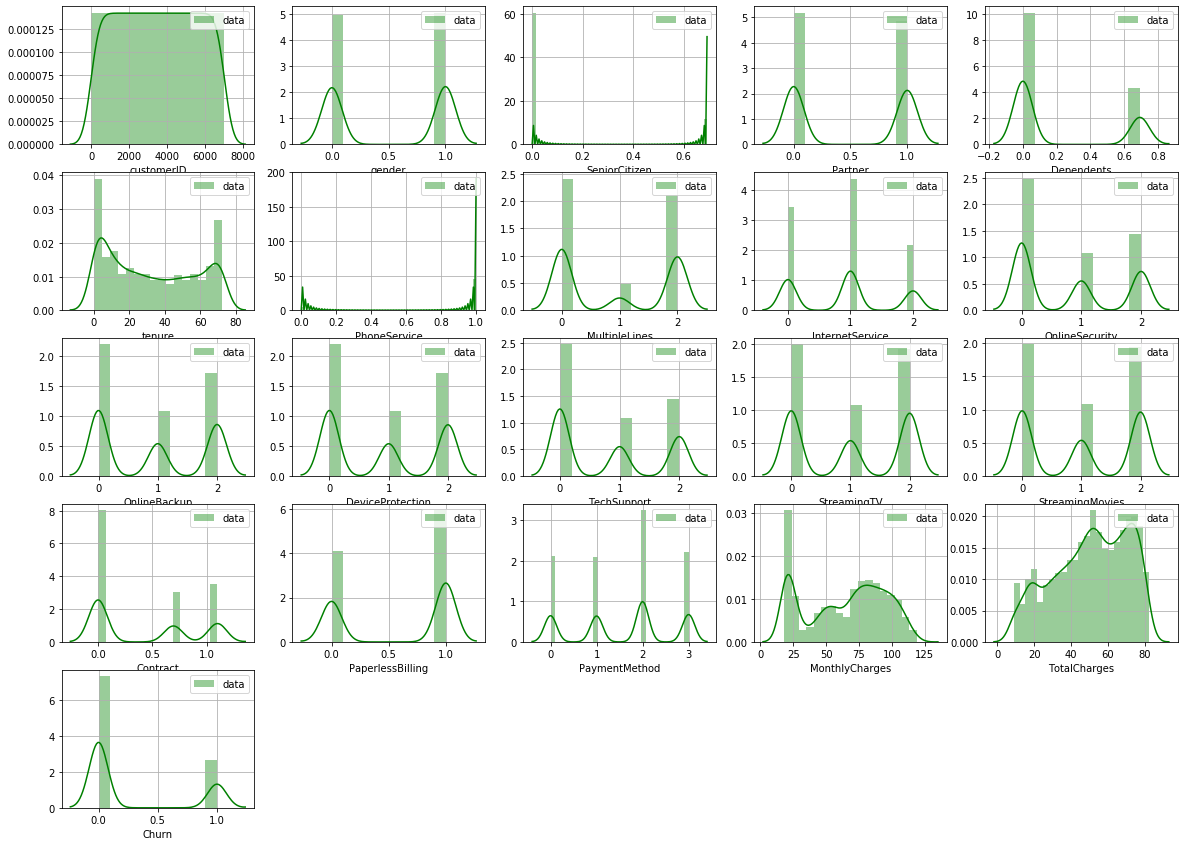

In [31]:
# Checking the Normal Distribution using distplot after removing outliers
plt.figure(figsize=(20,30))
for i,col in enumerate(list(df_Churn.columns.values)):
    plt.subplot(10,5,i+1)
    sns.distplot(df_Churn[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
df_Churn.skew()

In [32]:
# Checking the correlation
df_Churn.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

(21.0, 0.0)

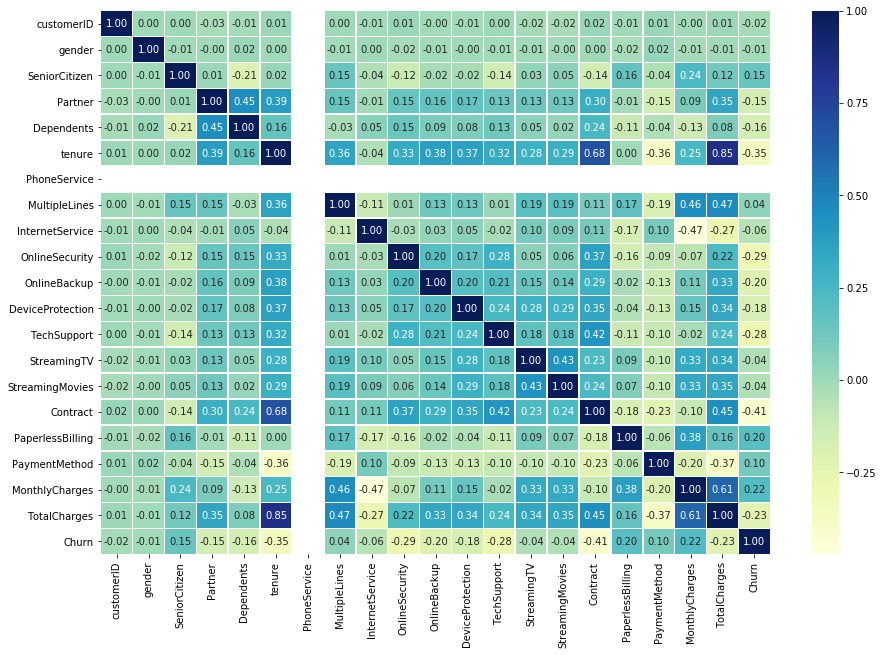

In [33]:
# Plotting Heatmap for Correlation
corr_matrix = df_Churn.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Feature Engineering

In [34]:
dfPaymentDummies = pd.get_dummies(df_Churn['PaymentMethod'], prefix = 'payment')
dfContractDummies = pd.get_dummies(df_Churn['Contract'], prefix = 'contract')
dfGenderDummies = pd.get_dummies(df_Churn['gender'], prefix = 'gender')
dfSeniorCitizenDummies = pd.get_dummies(df_Churn['SeniorCitizen'], prefix = 'SC')
dfInternetServiceDummies = pd.get_dummies(df_Churn['InternetService'], prefix = 'IS')
df
print(dfPaymentDummies.head(3))
print(dfContractDummies.head(3))
print(dfGenderDummies.head(3))
print(dfSeniorCitizenDummies.head(3))
print(dfInternetServiceDummies.head(3))

   payment_0  payment_1  payment_2  payment_3
1          0          0          0          1
2          0          0          0          1
4          0          0          1          0
   contract_0.0  contract_0.6931471805599453  contract_1.0986122886681098
1             0                            1                            0
2             1                            0                            0
4             1                            0                            0
   gender_0  gender_1
1         0         1
2         0         1
4         1         0
   SC_0.0  SC_0.6931471805599453
1       1                      0
2       1                      0
4       1                      0
   IS_0  IS_1  IS_2
1     1     0     0
2     1     0     0
4     0     1     0


In [35]:
#Dropping a columns
df_Churn.drop(['gender','PaymentMethod','Contract','SeniorCitizen','InternetService','customerID'], axis=1, inplace=True)

df_Churn = pd.concat([df_Churn, dfPaymentDummies], axis=1)
df_Churn = pd.concat([df_Churn, dfContractDummies], axis=1)
df_Churn = pd.concat([df_Churn, dfGenderDummies], axis=1)
df_Churn = pd.concat([df_Churn, dfSeniorCitizenDummies], axis=1)
df_Churn = pd.concat([df_Churn, dfInternetServiceDummies], axis=1)
df_Churn.head(2)


Partner  Dependents  tenure  PhoneService  MultipleLines  OnlineSecurity  \
1        0         0.0      34             1              0               2   
2        0         0.0       2             1              0               2   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  ...  \
1             0                 2            0            0  ...   
2             2                 0            0            0  ...   

   contract_0.0  contract_0.6931471805599453  contract_1.0986122886681098  \
1             0                            1                            0   
2             1                            0                            0   

   gender_0  gender_1  SC_0.0  SC_0.6931471805599453  IS_0  IS_1  IS_2  
1         0         1       1                      0     1     0     0  
2         0         1       1                      0     1     0     0  

[2 rows x 29 columns]

# Modeling


In [36]:
# Split data into X and y
X = df_Churn.drop("Churn", axis=1)

y = df_Churn["Churn"]

In [37]:
# Independent variables (no target column)
X.head()

Partner  Dependents  tenure  PhoneService  MultipleLines  OnlineSecurity  \
1        0    0.000000      34             1              0               2   
2        0    0.000000       2             1              0               2   
4        0    0.000000       2             1              0               0   
5        0    0.000000       8             1              2               0   
6        0    0.693147      22             1              2               0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  ...  \
1             0                 2            0            0  ...   
2             2                 0            0            0  ...   
4             0                 0            0            0  ...   
5             0                 2            0            2  ...   
6             2                 0            0            2  ...   

   contract_0.0  contract_0.6931471805599453  contract_1.0986122886681098  \
1             0                            1                            0   
2             1                            0                            0   
4             1                            0                            0   
5             1                            0                            0   
6             1                            0                            0   

   gender_0  gender_1  SC_0.0  SC_0.6931471805599453  IS_0  IS_1  IS_2  
1         0         1       1                      0     1     0     0  
2         0         1       1                      0     1     0     0  
4         1         0       1                      0     0     1     0  
5         1         0       1                      0     0     1     0  
6         0         1       1                      0     0     1     0  

[5 rows x 28 columns]

In [38]:
# Target variable
y


1       0
2       1
4       1
5       1
6       0
       ..
7037    0
7038    0
7039    0
7041    1
7042    0
Name: Churn, Length: 6361, dtype: int32

In [39]:
#checking shape of input variable
X.shape

(6361, 28)

In [40]:
#checking shape of target variable
y.shape

(6361,)

In [41]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

Partner  Dependents    tenure  PhoneService  MultipleLines  \
0    -0.972245   -0.653600  0.063470           0.0      -0.936163   
1    -0.972245   -0.653600 -1.237704           0.0      -0.936163   
2    -0.972245   -0.653600 -1.237704           0.0      -0.936163   
3    -0.972245   -0.653600 -0.993734           0.0       1.068190   
4    -0.972245    1.529987 -0.424470           0.0       1.068190   
...        ...         ...       ...           ...            ...   
6356 -0.972245   -0.653600  1.608613           0.0      -0.936163   
6357  1.028548    1.529987 -0.343147           0.0       1.068190   
6358  1.028548    1.529987  1.608613           0.0       1.068190   
6359  1.028548   -0.653600 -1.156381           0.0       1.068190   
6360 -0.972245   -0.653600  1.364643           0.0      -0.936163   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
0           1.436848     -1.052857          1.262811    -0.935165   
1           1.436848      1.252556         -1.044785    -0.935165   
2          -0.929747     -1.052857         -1.044785    -0.935165   
3          -0.929747     -1.052857          1.262811    -0.935165   
4          -0.929747      1.252556         -1.044785    -0.935165   
...              ...           ...               ...          ...   
6356        0.253551      0.099849          0.109013     0.246047   
6357        1.436848     -1.052857          1.262811     1.427259   
6358       -0.929747      1.252556          1.262811    -0.935165   
6359       -0.929747     -1.052857         -1.044785    -0.935165   
6360        1.436848     -1.052857          1.262811     1.427259   

      StreamingTV  ...  contract_0.0  contract_0.6931471805599453  \
0       -1.148627  ...     -1.105700                     1.946769   
1       -1.148627  ...      0.904405                    -0.513672   
2       -1.148627  ...      0.904405                    -0.513672   
3        1.145381  ...      0.904405                    -0.513672   
4        1.145381  ...      0.904405                    -0.513672   
...           ...  ...           ...                          ...   
6356    -0.001623  ...     -1.105700                    -0.513672   
6357     1.145381  ...     -1.105700                     1.946769   
6358     1.145381  ...     -1.105700                     1.946769   
6359    -1.148627  ...      0.904405                    -0.513672   
6360     1.145381  ...     -1.105700                    -0.513672   

      contract_1.0986122886681098  gender_0  gender_1    SC_0.0  \
0                       -0.563734 -0.992638  0.992638  0.441591   
1                       -0.563734 -0.992638  0.992638  0.441591   
2                       -0.563734  1.007416 -1.007416  0.441591   
3                       -0.563734  1.007416 -1.007416  0.441591   
4                       -0.563734 -0.992638  0.992638  0.441591   
...                           ...       ...       ...       ...   
6356                     1.773887  1.007416 -1.007416  0.441591   
6357                    -0.563734 -0.992638  0.992638  0.441591   
6358                    -0.563734  1.007416 -1.007416  0.441591   
6359                    -0.563734 -0.992638  0.992638 -2.264538   
6360                     1.773887 -0.992638  0.992638  0.441591   

      SC_0.6931471805599453      IS_0      IS_1      IS_2  
0                 -0.441591  1.630291 -0.973776 -0.561796  
1                 -0.441591  1.630291 -0.973776 -0.561796  
2                 -0.441591 -0.613387  1.026931 -0.561796  
3                 -0.441591 -0.613387  1.026931 -0.561796  
4                 -0.441591 -0.613387  1.026931 -0.561796  
...                     ...       ...       ...       ...  
6356              -0.441591 -0.613387 -0.973776  1.780004  
6357              -0.441591  1.630291 -0.973776 -0.561796  
6358              -0.441591 -0.613387  1.026931 -0.561796  
6359               2.264538 -0.613387  1.026931 -0.561796  
6360              -0.441591 -0.613387  1.026931 -0.5617

In [42]:
#since it is imbalanced dataset so we will focus on auc-roc score.
!pip install -U imbalanced-learn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.22,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

Requirement already up-to-date: imbalanced-learn in c:\users\devanshu suri\anaconda3\lib\site-packages (0.6.2)


In [43]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
from sklearn.feature_selection import SelectFromModel
def maxrandomcore(model,x,y):
    max_acc_score=0
    for acc_state in range(42,100): 
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=0.20,stratify=y)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        accuracy_score1=accuracy_score(y_test,y_pred)
        if accuracy_score1 > max_acc_score:
            max_acc_score=accuracy_score1
            final_acc_state=acc_state
    print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)
    return final_acc_state

In [44]:
# Evaluate the model on the training set
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.naive_bayes import MultinomialNB
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),
          "XGBClassifier":XGBClassifier(),
          "AdaBoostClassifier":AdaBoostClassifier()
         }

# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        acc_state=maxrandomcore(model,x,y)
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.20)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [45]:
#learning scores of a model
model_scores = fit_and_score(models=models)

model_scores


max acc score corresponding to 83 is: 0.8201099764336214
max acc score corresponding to 98 is: 0.781618224666143
max acc score corresponding to 80 is: 0.8091123330714847
max acc score corresponding to 47 is: 0.7737627651217597
max acc score corresponding to 71 is: 0.8185388845247447
max acc score corresponding to 80 is: 0.7525530243519246
max acc score corresponding to 98 is: 0.8232521602513747
max acc score corresponding to 53 is: 0.8075412411626081
max acc score corresponding to 83 is: 0.819324430479183


{'Logistic Regression': 0.8079795597484277,
 'KNN': 0.8413915094339622,
 'Random Forest': 0.9976415094339622,
 'GaussianNB': 0.7468553459119497,
 'SVC': 0.8254716981132075,
 'DecisionTreeClassifier': 0.9976415094339622,
 'GradientBoostingClassifier': 0.8386399371069182,
 'XGBClassifier': 0.9475235849056604,
 'AdaBoostClassifier': 0.8115172955974843}

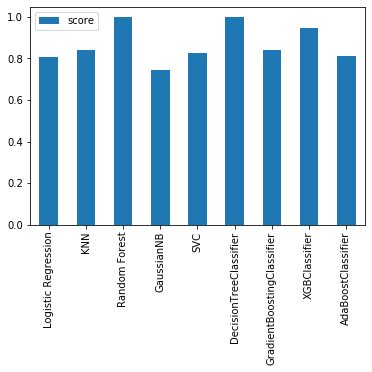

In [46]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

******************** SVC *********************


max acc score corresponding to 71 is: 0.8185388845247447
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy Score= 0.8185388845247447


Cross_val_score= 0.8016659005246745


roc_auc_score =  0.736003404577265


Classification report
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       933
           1       0.70      0.56      0.62       340

    accuracy                           0.82      1273
   macro avg       0.78      0.74      0.75      1273
weighted avg       0.81      0.82      0.81      1273



[[852  81]
 [150 190]]





******************** Random Forest *********************


max acc score corresponding to 56 is: 0.8138256087981147
RandomForestClassifier(bootstrap=T



Accuracy Score= 0.819324430479183


Cross_val_score= 0.8472838892782008


roc_auc_score =  0.7337352625937835


Classification report
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       933
           1       0.71      0.55      0.62       340

    accuracy                           0.82      1273
   macro avg       0.78      0.73      0.75      1273
weighted avg       0.81      0.82      0.81      1273



[[856  77]
 [153 187]]







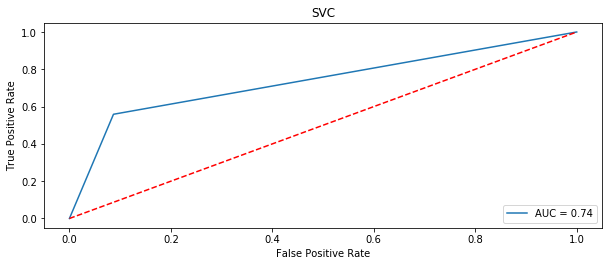

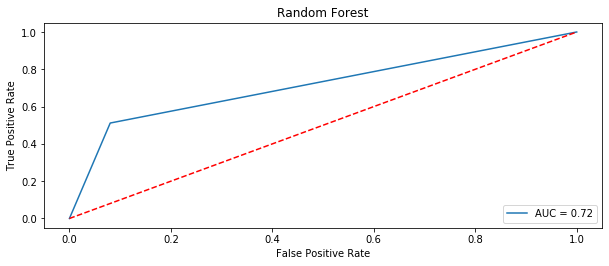

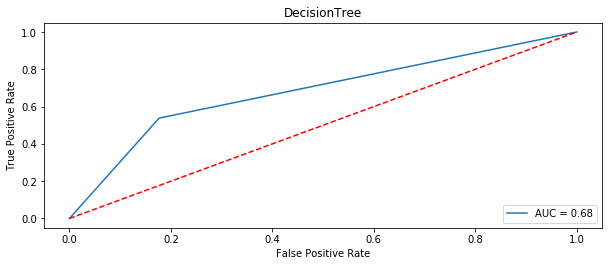

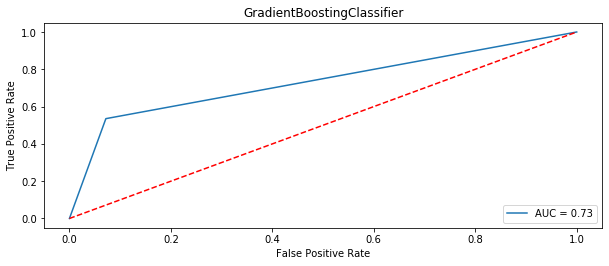

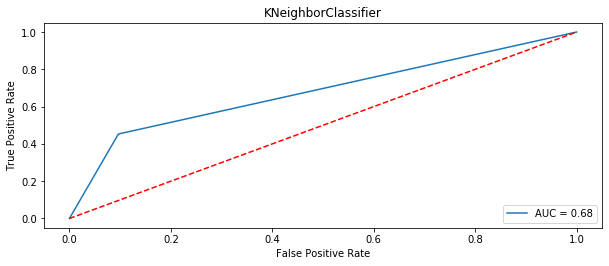

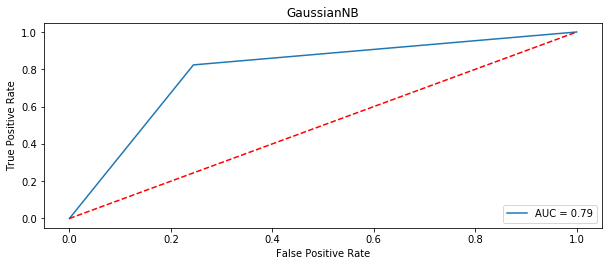

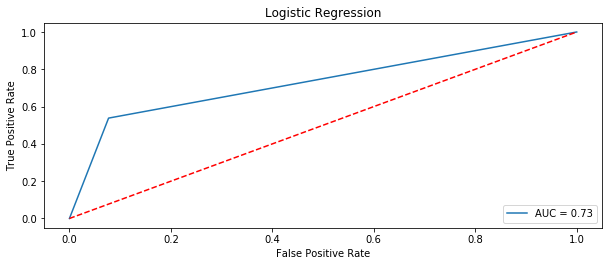

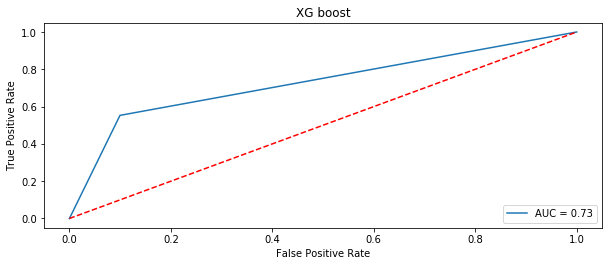

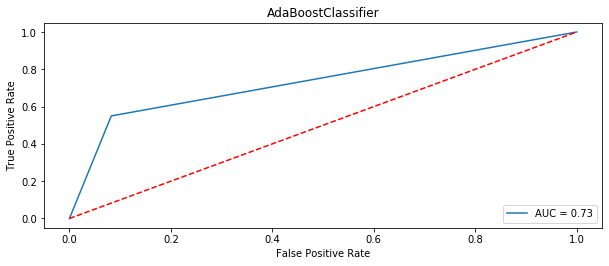

In [47]:
#Lists to store model name, Accuracy score, cross_val_score, Auc Roc score 
models =[]
models.append(("SVC",SVC()))
models.append(("Random Forest",RandomForestClassifier(n_estimators=100)))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))    
models.append(("KNeighborClassifier",KNeighborsClassifier(n_neighbors=6)))
models.append(("GaussianNB",GaussianNB()))
models.append(("Logistic Regression",LogisticRegression()))
models.append(("XG boost",XGBClassifier()))
models.append(('AdaBoostClassifier',AdaBoostClassifier()))

Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print("********************",name,"*********************")
    print('\n')
    Model.append(name)
    acc_state=maxrandomcore(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=0.20,stratify=y)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy Score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='roc_auc').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label= 'AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n\n")



In [48]:
#lookover the accuracy_score,Cross_val_score,Roc_auc_curve in a DataFrame which we calculated above
result=pd.DataFrame({'Model':Model,'accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

Model  accuracy_score  Cross_val_score  Roc_auc_curve
0                         SVC       81.853888        80.166590      73.600340
1               Random Forest       81.068342        82.419992      71.568943
2                DecisionTree       74.705420        65.473293      68.069321
3  GradientBoostingClassifier       82.325216        84.853462      73.174138
4         KNeighborClassifier       78.318932        78.852978      67.823908
5                  GaussianNB       77.376277        83.301443      78.957821
6         Logistic Regression       82.010998        85.083154      73.053244
7                    XG boost       80.754124        82.737707      72.663136
8          AdaBoostClassifier       81.932443        84.728389      73.373526

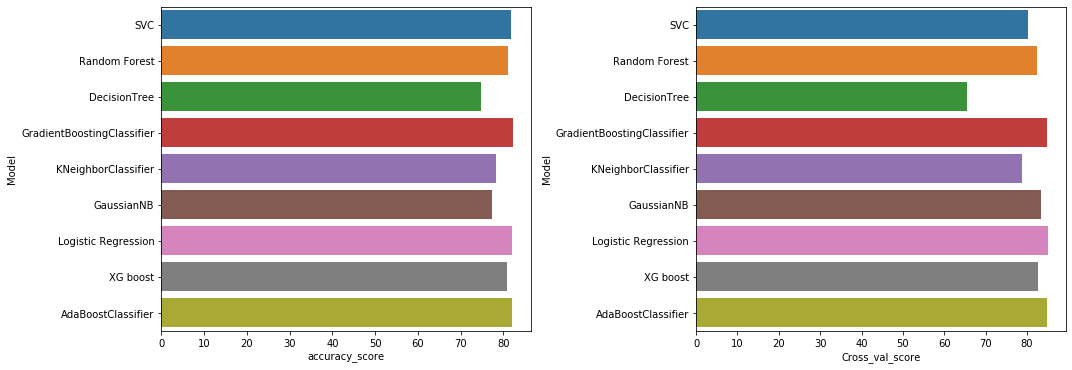

In [49]:
#Plotting bar plot of acc scores and cv scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'accuracy_score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross_val_score', y = 'Model', data = result)
plt.tight_layout()
plt.show()


In [50]:
#function to calculate accuracy,precision,recall and f1 score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

# Tuning a model with GridSearchCV

In [51]:
#lets use gridsearchcv to find out best parameters for GradientBoostingClassifier
grid_3 = {
    "learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,700,80]
    }
clf = GradientBoostingClassifier()

# Setup GridSearchCV
gs_clf3 = GridSearchCV(estimator=clf,
                      param_grid=grid_3,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf3.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.9s finished


In [52]:
# best parameters for GradientBoostingClassifier
print("Best parameter:",gs_clf3.best_params_)
print("score:",gs_clf3.best_score_)

Best parameter: {'learning_rate': 0.01, 'n_estimators': 500}
score: 0.801495789650596


In [53]:
#checking accuracy score and roc_auc_score using best parameters which calculated from gridsearchCV
gb=GradientBoostingClassifier(learning_rate= 0.01,n_estimators=500)
print("GradientBoostingClassifier accuracy score:",maxrandomcore(gb,x,y))
print("GradientBoostingClassifier roc_auc score:",max_aucroc_score(gb,x,y))

max acc score corresponding to 98 is: 0.821681068342498
GradientBoostingClassifier accuracy score: 98
max auc roc score corresponding to  83  is  0.7902476780185759
GradientBoostingClassifier roc_auc score: 83


In [54]:
#lets use gridsearchcv to find out best parameters for SVC
grid_4 = { 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000],'kernel':['linear','poly','rbf']
         }
clf = SVC()

# Setup GridSearchCV
gs_clf4 = GridSearchCV(estimator=clf,
                      param_grid=grid_4,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

gs_clf4.fit(x_train, y_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  5.1min finished


In [55]:
#best parameters for svc
print("Best parameter:",gs_clf4.best_params_)
print("score:",gs_clf4.best_score_)

Best parameter: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
score: 0.8028708420505628


In [56]:
#checking accuracy score and roc_auc_score using best parameters which calculated from gridsearchCV
svc=SVC(C=10,gamma=0.001,kernel='rbf')
print("SVC accuracy score:",maxrandomcore(svc,x,y))
print("SVC roc_auc score:",max_aucroc_score(svc,x,y))

max acc score corresponding to 71 is: 0.8232521602513747
SVC accuracy score: 71
max auc roc score corresponding to  64  is  0.7850590528609104
SVC roc_auc score: 64


In [57]:
#for getting best set of parameters for LogisticRegression we will use grid searchCV
from sklearn.model_selection import GridSearchCV
gridR = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"],'penalty':['l1','l2']}


clfR = LogisticRegression()

# Setup GridSearchCV
gs_clfR = GridSearchCV(estimator=clfR,
                      param_grid=gridR,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the GridSearchCV
gs_clfR.fit(x_train, y_train);

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    8.7s finished


In [58]:
# best parameters for LogisticRegression
print("Best parameter:",gs_clfR.best_params_)
print("score:",gs_clfR.best_score_)

Best parameter: {'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'liblinear'}
score: 0.8048362513112066


In [59]:
#checking accuracy score and roc_auc_score using best parameters which calculated from gridsearchCV
clfR = LogisticRegression(C= 0.23357214690901212, solver='liblinear',penalty='l2')
print("LogisticRegression accuracy score:",maxrandomcore(clfR,x,y))
print("LogisticRegression roc_auc score:",max_aucroc_score(clfR,x,y))

max acc score corresponding to 83 is: 0.8201099764336214
LogisticRegression accuracy score: 83
max auc roc score corresponding to  98  is  0.7873966705236055
LogisticRegression roc_auc score: 98


In [60]:
#lets use gridsearchcv to find out best parameters for XGBClassifier
grid_3 = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05,0.3,0.1,0.08], #so called `eta` value
              'max_depth': range(3,10,2),
              'min_child_weight': range(1,6,2),
              'silent': [1,0],
              'subsample': [0.5,0.6,0.7,0.8,0.9,1],
              'colsample_bytree': [0.7],
              'n_estimators': [5,20,50], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]
         }
clf = XGBClassifier()

# Setup GridSearchCV
gs_clf3 = GridSearchCV(estimator=clf,
                      param_grid=grid_3,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf3.fit(x_train, y_train);

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, m

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learn

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learnin

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learn

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learnin

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learnin

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learnin

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learn

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3,

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, 

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3,

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3,

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3,

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3,

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, ma

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3,

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3,

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_dept

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_c

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3,

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_dept

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3,

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, ma

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3,

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1,

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_r

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_r

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1,

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1,

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, ma

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learnin

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learni

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learnin

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learnin

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_r

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, lea

[Parallel(n_jobs=1)]: Done 8640 out of 8640 | elapsed: 11.5min finished


In [61]:
#best parameters for XGBClassifier
print("Best parameter:",gs_clf3.best_params_)
print("score:",gs_clf3.best_score_)

Best parameter: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'missing': -999, 'n_estimators': 50, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.7}
score: 0.8040502035147096


In [62]:
  #checking accuracy score and roc score using best parameters which calculated from gridsearchCV
xg=XGBClassifier(colsample_bytree=0.7,learning_rate=0.1,max_depth= 3,min_child_weight= 5,missing=-999,n_estimators= 50,nthread= 4,objective= 'binary:logistic',
 seed= 1337,
 silent= 1,
 subsample= 0.7)
print("XGBClassifier accuracy score:",maxrandomcore(xg,x,y))
print("XGBClassifier roc_auc score:",max_aucroc_score(xg,x,y))

max acc score corresponding to 71 is: 0.8240377062058131
XGBClassifier accuracy score: 71
max auc roc score corresponding to  83  is  0.7859737728158781
XGBClassifier roc_auc score: 83


In [63]:
#lets use gridsearchcv to find out best parameters for AdaBoostClassifier
grid_ad =  {
 'n_estimators': [50,60,70],
 'learning_rate' : [0.01,0.05,0.1,0.3,1]
}
clf = AdaBoostClassifier()

# Setup GridSearchCV
gs_clfad = GridSearchCV(estimator=clf,
                      param_grid=grid_ad,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clfad.fit(x_train, y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.8s finished


In [64]:
# best parameters for AdaBoostClassifier
print("Best parameter:",gs_clfad.best_params_)
print("score:",gs_clfad.best_score_)

Best parameter: {'learning_rate': 0.3, 'n_estimators': 50}
score: 0.8007089691356952


In [65]:
#checking accuracy score and roc score using best parameters which calculated from gridsearchCV 
ad=AdaBoostClassifier(learning_rate=0.3,n_estimators=50)
print("AdaBoostClassifier accuracy score:",maxrandomcore(ad,x,y))
print("AdaBoostClassifier roc_auc score:",max_aucroc_score(ad,x,y))

max acc score corresponding to 83 is: 0.828750981932443
AdaBoostClassifier accuracy score: 83
max auc roc score corresponding to  98  is  0.7848349334417446
AdaBoostClassifier roc_auc score: 98


# After all this process conclusion is that XGBClassifier  performing well because of high roc_auc score and accuracy score.


In [66]:
#lets make our final model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 71,test_size=0.20,stratify=y)
xg=XGBClassifier(colsample_bytree=0.7,learning_rate=0.1,max_depth= 3,min_child_weight= 5,missing=-999,n_estimators= 50,nthread= 4,objective= 'binary:logistic',
 seed= 1337,
 silent= 1,
 subsample= 0.7)
xg.fit(x_train,y_train)
predgxg=xg.predict(x_test)
evaluate_preds(y_test,predgxg)

Acc: 82.40%
Precision: 0.71
Recall: 0.58
F1 score: 0.64


{'accuracy': 0.82, 'precision': 0.71, 'recall': 0.58, 'f1': 0.64}

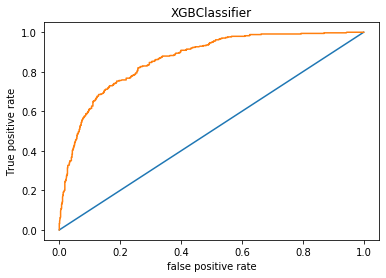

roc_auc_score =  0.8639871382636656


In [67]:
# Make predictions with probabilities
y_probs = xg.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='XGBClassifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('XGBClassifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

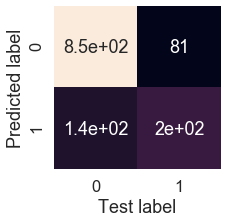

In [68]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, predgxg):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, predgxg),
                     annot=True,
                     cbar=False)
    plt.xlabel("Test label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, predgxg)

In [69]:
#lets printed confusion_matrix
print(confusion_matrix(y_test, predgxg))

[[852  81]
 [143 197]]


In [70]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=predgxg
test
# On the lest side values are those fields which are taken by machine for test...

Churn  Predicted values
2123      0                 0
132       0                 0
5164      0                 0
84        0                 0
944       0                 0
...     ...               ...
4994      1                 1
6807      0                 0
5104      0                 0
2060      0                 0
4795      1                 0

[1273 rows x 2 columns]

In [71]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(predgxg)
df1.to_csv('Project_20_Customer_Churn_submission.csv')

# Feature importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (Churn) 

In [72]:
# Find feature importance of our best model
xg.feature_importances_

array([0.        , 0.01294319, 0.03860974, 0.        , 0.01865698,
       0.10700338, 0.01327083, 0.01128872, 0.07647981, 0.01286757,
       0.01760653, 0.01910882, 0.01901999, 0.02847592, 0.        ,
       0.        , 0.04128978, 0.00677034, 0.2956601 , 0.0153873 ,
       0.03467901, 0.01208444, 0.01110485, 0.01462037, 0.00340899,
       0.03527604, 0.13492675, 0.01946066], dtype=float32)

In [73]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=28):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:80])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()



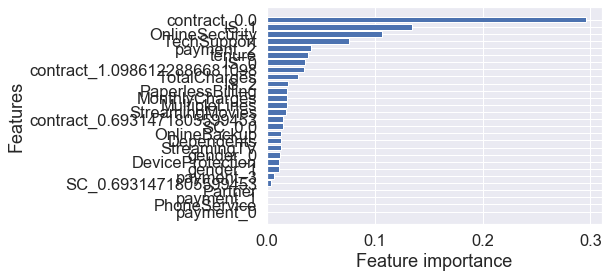

In [74]:
#bar plot of important features 
plot_features(x_train.columns, xg.feature_importances_)
#Looks like Contract contribute the most.

In [75]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(xg,'Project_20_Customer_Churn_submission.pkl')

['Project_20_Customer_Churn_submission.pkl']

In [76]:
#read the file using joblib
xgb_from_joblib=joblib.load('Project_20_Customer_Churn_submission.pkl')
joblib_y_preds = xgb_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 82.40%
Precision: 0.71
Recall: 0.58
F1 score: 0.64


{'accuracy': 0.82, 'precision': 0.71, 'recall': 0.58, 'f1': 0.64}

## Conclusion:

1) Number of customers who are parteners are less.
2) Males and Females customers are almost equal.
3) Proportion of churn in Senior Citizen Customers are more as compared to the young ones.
4) Proportion of churn in customers who aren't parteners is more.
5) Customers who don't have dependents are more in number and have more proportion of churn.
6) As Tenure increases number of Customers with churn also decreases
7) Customers who uses phone services have more proportion of churn.
8) Customers who uses Fiber optic internet service have more proportion of churn.
9) Customers who don't have any online security, Tech support, Streaming TV, device protection and online backup have more        proportion of churn.
10) Customers whose Contract are month to month are more in number and have more proportion of churn.
11) Customers who prefer Paperless billing are more in number and have more churn.
12) Customers who use Electronic Check are more in number and have more churn proportion.
13) Customers who won't leave are more in number. 
14) Senior citizen have more total chrages to company.
15) Total Charges are more for those who are Parteners.
16) Those who have dependents have more Total Charges.
17) As tenure increases Total Charges also increases.
18) Customers having Fiber optic(internet service), Phoneservice, Online Security, Online Backup, Device Protection,               TechSupport, Streaming Movies and Streming TV do have more Total Charges.
19) Customers having 2 year Contract have more Total Charges.
20) Customers who prefer Paperless billing have moe Total Charges.
21) Bank Transfer(automatic) and credit card(automatic) have more Total Charges.
22) The customers who don't decide to leave are have more total charges. 

## Steps Followed:

1) Data Analysis.
2) EDA Analysis.
3) Best parameters are found using Gridsearch cv and applied to models.
4) Best parameters are applied to each models and machine is trained for each models to find Best Accuracy Score.
5) AUC ROC Curves are made for each model.
6) A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.
7) XGBClassifier is used to train the model finally as it's accuracy score is best among the rest of the models.
8) Predicted values are saved in Project_20_Customer_Churn_submission.csv file.
9) Pickle file is named with Project_20_Customer_Churn_submission.pkl 